# Proyecto Análisis Liga MX y predicción campeón Clausura 2023

Integrantes del equipo 10
*   Antonio Torres Flores
-------------------------------------------------------------------------------

Anteriormente el deporte solo se dejaba a los jugadores y entrenadores, pero ahora con la gran cantidad de dispositivos y más gente involucrada en el mismo se tiene gran cantidad de información para analizar y mejorar el rendimiento tanto de los deportistas como el equipo.

México es un país con gran tradición futbolera con una liga muy fuerte económicamente, actualmente se tiene la primera división con 18 equipos los cuales tiene un valor que ronda entre 60 y 70 millones de dólares sin incluir a futbolistas.

Esta cantidad es un precio elevado que no cualquiera tiene la capacidad de invertir, esto indica que los equipos tienen un gran valor en el mercado y por lo tanto una gran cantidad de seguidores lo que significa que los equipos tienen la capacidad de generar ingresos significativos mediante la venta de entradas, publicidad entre otros.

Hay equipos más valiosos que otros debido a su historia, su éxito deportivo o la popularidad entre la afición, equipos como América, Chivas, Cruz azul son equipos con gran cantidad de seguidores en todo el país y por lo tanto tienen un valor más alto. Y hay otros casos que apesar del éxito deportivo no tienen gran cantidad de seguidores como Pachuca o Toluca.

Sin embargo, el hecho que una franquicia tenga un valor alto no siempre indica que sea rentable. Al igual que otros negocio los equipos tienen una serie de gastos como salarios de jugadores, viajes del equipo, gastos del estadio, entre otros. Es por eso que los inversionistas o dueños están interesados en el rendimiento deportivo del equipo ya que este puede impactar en la rentabilidad del negocio. Si un equipo no tiene éxito en la cancha puede afectar su capacidad para genera ingresos a través de la venta de entradas y patrocinadores. 

El presente proyecto es para tratar de **predecir** las **finales del actual torneo Clausura 2023** así como el **campeón** mediante modelos de **machine Learning**.

Para el análisis se obtuvo un dataset de la página https://fbref.com/es/comps/31/Estadisticas-de-Liga-MX con las principales estadísticas de los equipos que conforman la liga MX.

## 1. Limpieza de datos

Importamos algunas librerias importantes para comenzar como:

- Pandas - Procesamiento, manipulacion y transformación de datos
- Seaborn - Visualizacion de datos
- Numpy - Funciones matematicas, algebra linear
- Matplotlib - visualización de datos
- Skew y Kurtosis de scipy.stats - para obtener curtosis y asimetria
- Librerias sklearn - para modelos de machine learning


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

from sklearn import tree as treeClassifier
from sklearn.ensemble import RandomForestClassifier as forest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.datasets import make_classification 

from sklearn.metrics import (r2_score, roc_auc_score, classification_report, roc_curve, auc)


import warnings
warnings.filterwarnings('ignore')
import plotly
sns.set_style('darkgrid')

Importamos y carga de los datasets con los que se va a trabajar

In [2]:
df_partidos = pd.read_csv('Partidos_MX.csv')
df_posiciones = pd.read_csv('posiciones_MX.csv')

### 1.1. Revisión y limpieza de df_partidos

In [3]:
df_partidos.head()

,Temporada,Torneo,Fase,Jornada,Fecha,Local,Marcador,Visitante,Asistencia,Sedes
0,2014-2015,Apertura 2014,Temporada Regular,1.0,2014/07/19,Cruz Azul,0–1,Pachuca,NaN,Estadio Azul
1,2014-2015,Apertura 2014,Temporada Regular,1.0,2014/07/19,Veracruz,0–1,Santos,NaN,Estadio Luis de la Fuente
2,2014-2015,Apertura 2014,Temporada Regular,1.0,2014/07/18,Queretaro,1–3,UNAM,NaN,Estadio La Corregidora
3,2014-2015,Apertura 2014,Temporada Regular,1.0,2014/07/18,Tijuana,0–1,Puebla,NaN,Estadio Caliente
4,2014-2015,Apertura 2014,Temporada Regular,1.0,2014/07/20,Toluca,0–0,Morelia,NaN,Estadio Nemesio Diez


Revisamos tipo de datos

In [4]:
df_partidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2953 entries, 0 to 2952
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Temporada   2953 non-null   object 
 1   Torneo      2953 non-null   object 
 2   Fase        2953 non-null   object 
 3   Jornada     2709 non-null   float64
 4   Fecha       2953 non-null   object 
 5   Local       2953 non-null   object 
 6   Marcador    2953 non-null   object 
 7   Visitante   2953 non-null   object 
 8   Asistencia  1823 non-null   float64
 9   Sedes       2953 non-null   object 
dtypes: float64(2), object(8)
memory usage: 230.8+ KB


Descripción de las columnas

 - **Temporada**. Temporada jugada
 - **Torneo**. Torneo que se disputa
 - **Fase**. Fase del torneo
 - **Jornada**. Número de jornada del torneo
 - **Fecha**. Fecha del partido jugado
 - **Local**. Equipo local
 - **Marcador**. Resultado del partido
 - **Visitante**. Equipo Visitante
 - **Asistencia**. Cantidad de personas en el estadio
 - **Sedes**. Nombre del estadio donde se jugó el partido


Se realiza ajuste (cast) de los tipos de datos para las columnas Jornada y Fecha para un mejor manejo de las mismas

In [5]:
df_partidos.Jornada = df_partidos.Jornada.astype(str)
df_partidos["Fecha"] = pd.to_datetime(df_partidos["Fecha"])

df_resultados=df_partidos["Marcador"].str.split('–', expand=True)
df_resultados.columns = ['GolesLocal', 'GolesVisitante']
df_partidos['GolesLocal'] = df_resultados['GolesLocal']
df_partidos['GolesVisitante'] = df_resultados['GolesVisitante']
df_partidos.GolesLocal = df_partidos.GolesLocal.astype(int)
df_partidos.GolesVisitante = df_partidos.GolesVisitante.astype(int)

df_partidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2953 entries, 0 to 2952
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Temporada       2953 non-null   object        
 1   Torneo          2953 non-null   object        
 2   Fase            2953 non-null   object        
 3   Jornada         2953 non-null   object        
 4   Fecha           2953 non-null   datetime64[ns]
 5   Local           2953 non-null   object        
 6   Marcador        2953 non-null   object        
 7   Visitante       2953 non-null   object        
 8   Asistencia      1823 non-null   float64       
 9   Sedes           2953 non-null   object        
 10  GolesLocal      2953 non-null   int32         
 11  GolesVisitante  2953 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(8)
memory usage: 253.9+ KB


In [6]:
def puntosObtenidos(gl, gv):
    if gl > gv:
        return pd.Series([0, 3, 0])
    if gl < gv:
        return pd.Series([1, 0, 3])
    else:
        return pd.Series([2, 1, 1])

resultados = df_partidos.apply(lambda x: puntosObtenidos(x["GolesLocal"], x["GolesVisitante"]), axis=1)

In [7]:
df_partidos[["Resultado", "PuntosLocal", "PuntosVisitante"]] = resultados

In [8]:
df_partidos.tail()

,Temporada,Torneo,Fase,Jornada,Fecha,Local,Marcador,Visitante,Asistencia,Sedes,GolesLocal,GolesVisitante,Resultado,PuntosLocal,PuntosVisitante
2948,2022-2023,Clausura 2023,Temporada Regular,17.0,2023-04-29,Atletico,0–0,Atlas,NaN,Estadio Alfonso Lastras Ramirez,0,0,2,1,1
2949,2022-2023,Clausura 2023,Temporada Regular,17.0,2023-04-29,Guadalajara,4–1,Mazatlan,NaN,Estadio Akron,4,1,0,3,0
2950,2022-2023,Clausura 2023,Temporada Regular,17.0,2023-04-29,Monterrey,4–1,UNAM,45915.0,Estadio BBVA Bancomer,4,1,0,3,0
2951,2022-2023,Clausura 2023,Temporada Regular,17.0,2023-04-29,Cruz Azul,3–2,Santos,NaN,Estadio Azteca,3,2,0,3,0
2952,2022-2023,Clausura 2023,Temporada Regular,17.0,2023-04-30,Leon,3–0,UANL,NaN,Estadio Leon,3,0,0,3,0


In [9]:
# Revisamos que no tengamos datos vacíos
df_partidos.isna().sum()

Temporada             0
Torneo                0
Fase                  0
Jornada               0
Fecha                 0
Local                 0
Marcador              0
Visitante             0
Asistencia         1130
Sedes                 0
GolesLocal            0
GolesVisitante        0
Resultado             0
PuntosLocal           0
PuntosVisitante       0
dtype: int64

In [10]:
df_partidos.Local.value_counts()

UANL           181
America        180
Monterrey      173
Santos         168
Pachuca        168
Leon           167
Toluca         167
Cruz Azul      165
UNAM           163
Atlas          162
Guadalajara    162
Puebla         160
Tijuana        157
Queretaro      154
Necaxa         121
Morelia        106
Veracruz        96
Atletico        66
FC Juarez       65
Chiapas         53
Mazatlan        51
Lobos BUAP      34
UdeG            17
Sinaloa         17
Name: Local, dtype: int64

In [11]:
df_partidos.head()

,Temporada,Torneo,Fase,Jornada,Fecha,Local,Marcador,Visitante,Asistencia,Sedes,GolesLocal,GolesVisitante,Resultado,PuntosLocal,PuntosVisitante
0,2014-2015,Apertura 2014,Temporada Regular,1.0,2014-07-19,Cruz Azul,0–1,Pachuca,NaN,Estadio Azul,0,1,1,0,3
1,2014-2015,Apertura 2014,Temporada Regular,1.0,2014-07-19,Veracruz,0–1,Santos,NaN,Estadio Luis de la Fuente,0,1,1,0,3
2,2014-2015,Apertura 2014,Temporada Regular,1.0,2014-07-18,Queretaro,1–3,UNAM,NaN,Estadio La Corregidora,1,3,1,0,3
3,2014-2015,Apertura 2014,Temporada Regular,1.0,2014-07-18,Tijuana,0–1,Puebla,NaN,Estadio Caliente,0,1,1,0,3
4,2014-2015,Apertura 2014,Temporada Regular,1.0,2014-07-20,Toluca,0–0,Morelia,NaN,Estadio Nemesio Diez,0,0,2,1,1


### 1.2. Revisión y limpieza de df_posiciones

In [12]:
df_posiciones.head()

,Torneo,Posicion,Equipo,PJ,PG,PE,PP,GF,GC,DG,Puntos,Puntos_TA,Posicion_TA,Posicion_cambio,Liguilla,Campeon
0,Apertura 2014,1,America,17,9,4,4,28,18,10,31,25,5,4,1,1
1,Apertura 2014,2,UANL,17,8,7,2,25,17,8,31,21,14,12,1,0
2,Apertura 2014,3,Atlas,17,9,4,4,22,20,2,31,21,12,9,1,0
3,Apertura 2014,4,Toluca,17,8,5,4,24,18,6,29,32,2,-2,1,0
4,Apertura 2014,5,Chiapas,17,7,7,3,24,20,4,28,23,9,4,1,0


In [13]:
df_partidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2953 entries, 0 to 2952
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Temporada        2953 non-null   object        
 1   Torneo           2953 non-null   object        
 2   Fase             2953 non-null   object        
 3   Jornada          2953 non-null   object        
 4   Fecha            2953 non-null   datetime64[ns]
 5   Local            2953 non-null   object        
 6   Marcador         2953 non-null   object        
 7   Visitante        2953 non-null   object        
 8   Asistencia       1823 non-null   float64       
 9   Sedes            2953 non-null   object        
 10  GolesLocal       2953 non-null   int32         
 11  GolesVisitante   2953 non-null   int32         
 12  Resultado        2953 non-null   int64         
 13  PuntosLocal      2953 non-null   int64         
 14  PuntosVisitante  2953 non-null   int64  

Juntando ambos datasets en un df final para trabajar con **ML**, se hace la unión con *merge* mediante los campos **torneo** y **equipo**.

In [14]:

df_ml = df_partidos.merge(df_posiciones[["Torneo","Equipo","Puntos","Puntos_TA","Posicion","Posicion_TA","Posicion_cambio"]], 
                       left_on=["Torneo","Local"], 
                       right_on=["Torneo","Equipo"]).drop(["Equipo"], axis=1)

df_ml = df_ml.merge(df_posiciones[["Torneo","Equipo","Puntos","Puntos_TA","Posicion","Posicion_TA","Posicion_cambio"]], 
                       left_on=["Torneo","Visitante"], 
                       right_on=["Torneo","Equipo"],
                               suffixes=("_local", "_visitante")).drop(["Equipo"], axis=1)

In [15]:
df_ml.tail()

,Temporada,Torneo,Fase,Jornada,Fecha,Local,Marcador,Visitante,Asistencia,Sedes,...,Puntos_local,Puntos_TA_local,Posicion_local,Posicion_TA_local,Posicion_cambio_local,Puntos_visitante,Puntos_TA_visitante,Posicion_visitante,Posicion_TA_visitante,Posicion_cambio_visitante
2948,2022-2023,Clausura 2023,Temporada Regular,7.0,2023-02-14,Atletico,1–3,America,NaN,Estadio Alfonso Lastras Ramirez,...,19,18,12,13,1,34,38,2,1,-1
2949,2022-2023,Clausura 2023,Temporada Regular,17.0,2023-04-28,FC Juarez,0–1,America,NaN,Estadio Olimpico Benito Juarez,...,15,19,16,11,-5,34,38,2,1,-1
2950,2022-2023,Clausura 2023,Temporada Regular,2.0,2023-01-14,Toluca,2–2,America,NaN,Estadio Nemesio Diez,...,32,27,4,6,2,34,38,2,1,-1
2951,2022-2023,Clausura 2023,Temporada Regular,11.0,2023-03-11,UANL,0–2,America,NaN,Estadio Universitario de Nuevo Leon,...,25,30,7,5,-2,34,38,2,1,-1
2952,2022-2023,Clausura 2023,Temporada Regular,12.0,2023-03-18,Guadalajara,2–4,America,NaN,Estadio Akron,...,34,22,3,9,6,34,38,2,1,-1


## 2. Análisis de datos

Hacemos una copia de df_posiciones en el dataframe df para un mejor manejo de las sentencias

In [16]:
df = df_posiciones

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Posicion,325.0,9.529231,5.214821,1.0,5.0,10.0,14.0,19.0
PJ,325.0,16.670769,1.634667,10.0,17.0,17.0,17.0,18.0
PG,325.0,6.070769,2.403298,0.0,4.0,6.0,8.0,13.0
PE,325.0,4.526154,2.011562,0.0,3.0,4.0,6.0,11.0
PP,325.0,6.073846,2.493342,1.0,4.0,6.0,8.0,14.0
GF,325.0,21.981538,6.256821,7.0,18.0,21.0,26.0,41.0
GC,325.0,21.984615,6.176150,7.0,18.0,21.0,26.0,45.0
DG,325.0,-0.003077,9.024828,-34.0,-6.0,0.0,6.0,27.0
Puntos,325.0,22.738462,6.911426,4.0,18.0,23.0,28.0,41.0
Puntos_TA,325.0,22.649231,6.894266,0.0,18.0,23.0,27.0,41.0


Exploramos las pricipales medidas estadisticas para cada una de las columnas y podemos observar a simple vista que tenemos un dato extraño en DG con -34 lo cual al revisarlo es correcto ya que en la torneo Apertura 2019 el equipo Veracruz solo hizo 11 goles y le anotaron 45 es por eso la diferencia negativa.

In [18]:
df_posiciones[df_posiciones['DG']==-34]

,Torneo,Posicion,Equipo,PJ,PG,PE,PP,GF,GC,DG,Puntos,Puntos_TA,Posicion_TA,Posicion_cambio,Liguilla,Campeon
198,Apertura 2019,19,Veracruz,18,1,5,12,11,45,-34,8,4,18,-1,0,0


Se obtienen un listado para filtrar los datos por los últimos 10 torneos

In [19]:
#ultimos10 = ['Apertura 2018', 'Clausura 2019', 'Apertura 2019', 'Clausura 2020', 'Guardianes 2020', 'Guardianes 2021', 'Apertura 2021',
ultimos10 = ['Apertura 2018', 'Clausura 2019', 'Apertura 2019', 'Guardianes 2020', 'Guardianes 2021', 'Apertura 2021',
       'Clausura 2022', 'Apertura 2022', 'Clausura 2023']
df_resume = df[df.Torneo.isin(ultimos10)]

In [20]:
df_resume.head()

,Torneo,Posicion,Equipo,PJ,PG,PE,PP,GF,GC,DG,Puntos,Puntos_TA,Posicion_TA,Posicion_cambio,Liguilla,Campeon
144,Apertura 2018,1,Cruz Azul,17,11,3,3,26,13,13,36,22,12,11,1,0
145,Apertura 2018,2,America,17,9,6,2,33,17,16,33,29,2,0,1,1
146,Apertura 2018,3,UNAM,17,8,6,3,29,19,10,30,24,7,4,1,0
147,Apertura 2018,4,Santos,17,8,6,3,27,18,9,30,29,4,0,1,0
148,Apertura 2018,5,Monterrey,17,9,3,5,25,19,6,30,29,3,-2,1,0


## 3. Visualización de los datos

Graficaremos algunos boxplots para tener una mejor claridad de la distribución de los datos


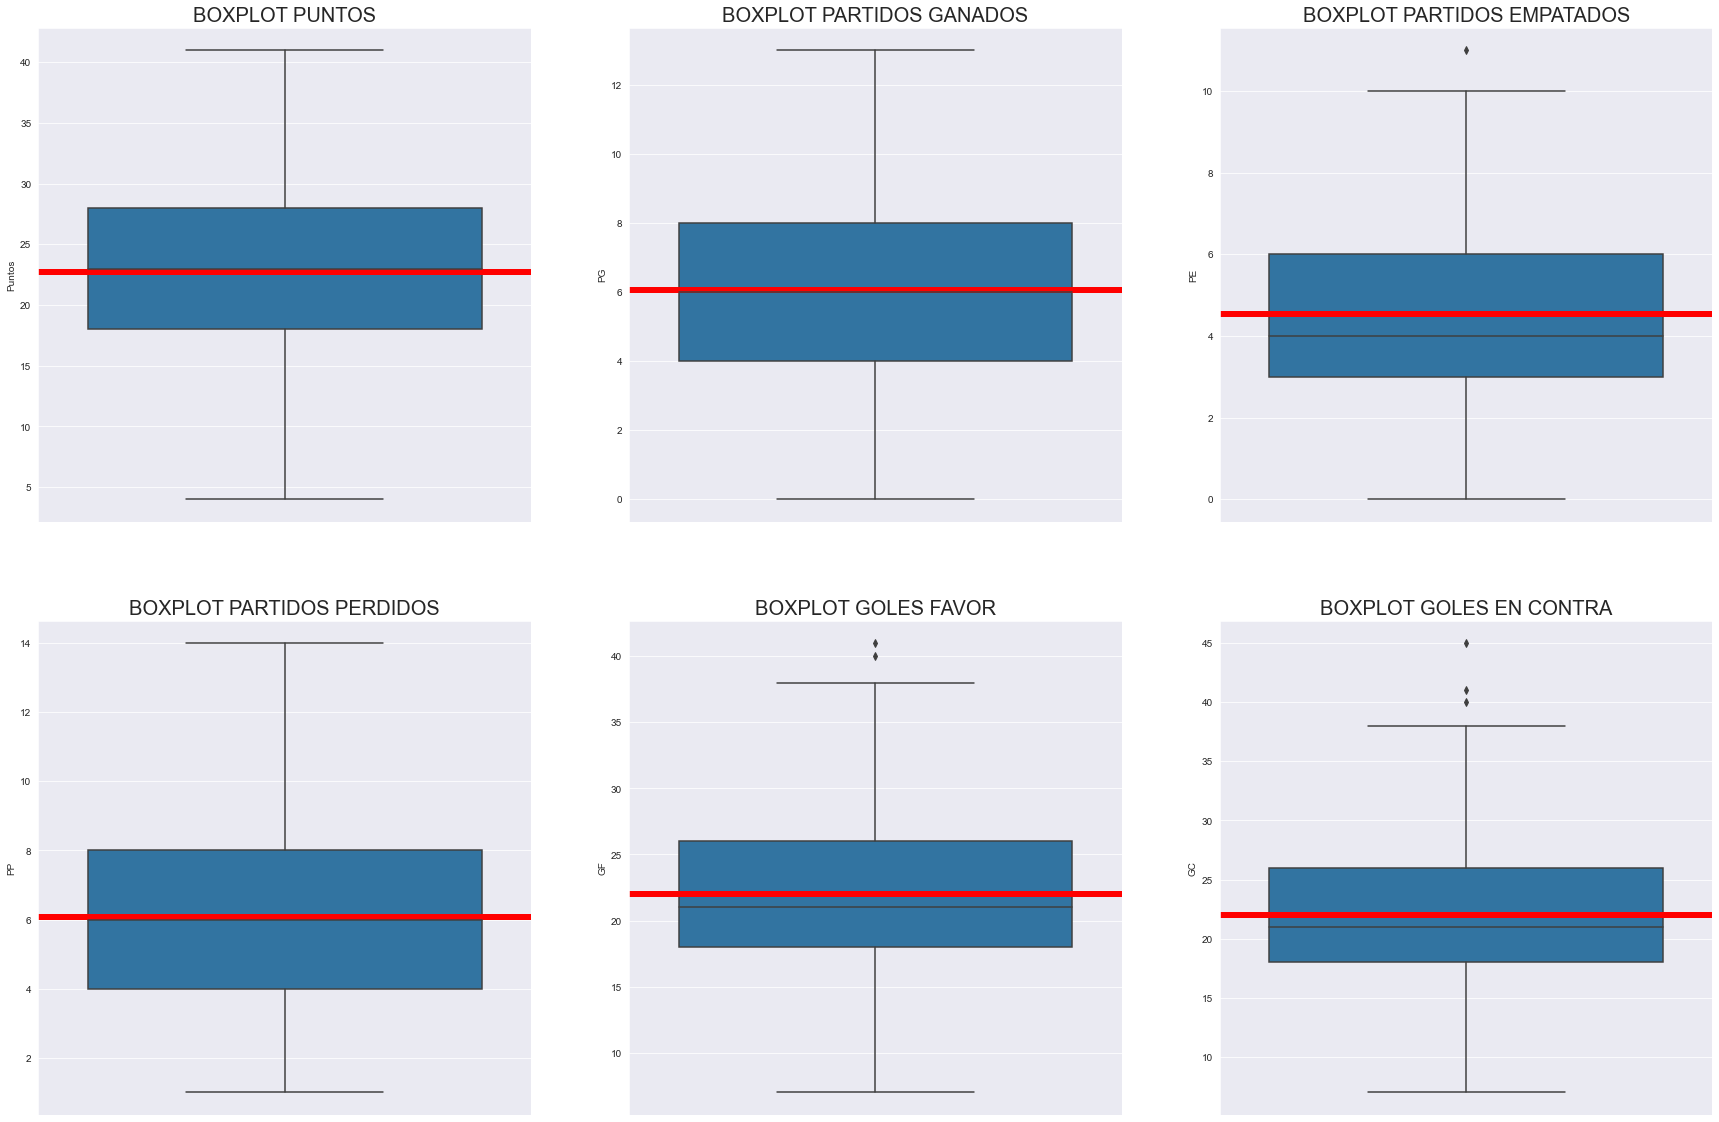

In [21]:
plt.figure(figsize=(30,20))

plt.subplot(2,3,1)
sns.boxplot(y=df['Puntos']);
plt.axhline(df['Puntos'].mean(), linewidth=6, c = 'r')
plt.title('BOXPLOT PUNTOS', fontsize=20);

plt.subplot(2,3,2)
sns.boxplot(y=df['PG']);
plt.axhline(df['PG'].mean(), linewidth=6, c = 'r')
plt.title('BOXPLOT PARTIDOS GANADOS', fontsize=20);

plt.subplot(2,3,3)
sns.boxplot(y=df['PE']);
plt.axhline(df['PE'].mean(), linewidth=6, c = 'r')
plt.title('BOXPLOT PARTIDOS EMPATADOS', fontsize=20);

plt.subplot(2,3,4)
sns.boxplot(y=df['PP']);
plt.axhline(df['PP'].mean(), linewidth=6, c = 'r')
plt.title('BOXPLOT PARTIDOS PERDIDOS', fontsize=20);

plt.subplot(2,3,5)
sns.boxplot(y=df['GF']);
plt.axhline(df['GF'].mean(), linewidth=6, c = 'r')
plt.title('BOXPLOT GOLES FAVOR', fontsize=20);

plt.subplot(2,3,6)
sns.boxplot(y=df['GC']);
plt.axhline(df['GC'].mean(), linewidth=6, c = 'r')
plt.title('BOXPLOT GOLES EN CONTRA', fontsize=20);

#### Análisis de boxplot de nuestros datos

*   PUNTOS: podemos ver que nuestros datos parecieran tener una distribución normal.
*   PARTIDOS GANADOS: Podemos ver que los datos también tiene una distribución parecida a la normal
*   PARTIDOS EMPATADOS: Observamos que la distribución de los datos tiene un sesgo hacia la derecha con un poco outliers que se encuentran después del rango intercuartílico
*   PARTIDOS PERDIDOS: Observamos que el 50% se encuentra entre 4 y 8 perdidos y la media se encuentra en 6 partidos
*   GOLES A FAVOR: el 50% de nuestros datos se encuentran entre 18 y 26 goles y tenemos unos cuantos datos atípicos
*   GOLES EN CONTRA: Vemos que los datos se distribuyen entre 18 a 26 teniendo una media de 22 goles en contra y existen algunos datos atípicos.


Realizamos una gráfica de puntos y goles por equipo de los últimos torneos

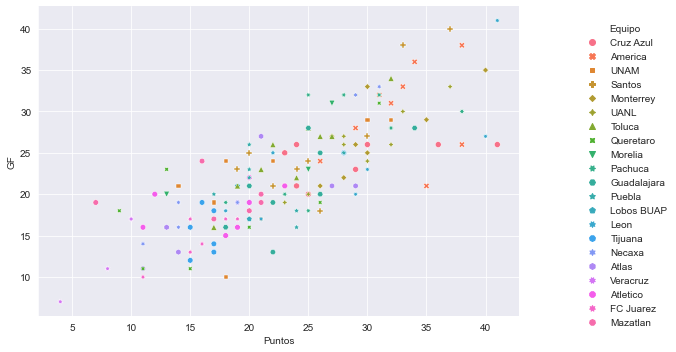

In [22]:
g=sns.relplot(x='Puntos',y='GF',data=df_resume,hue='Equipo',style='Equipo')
g.fig.set_size_inches(10,5)
plt.show()

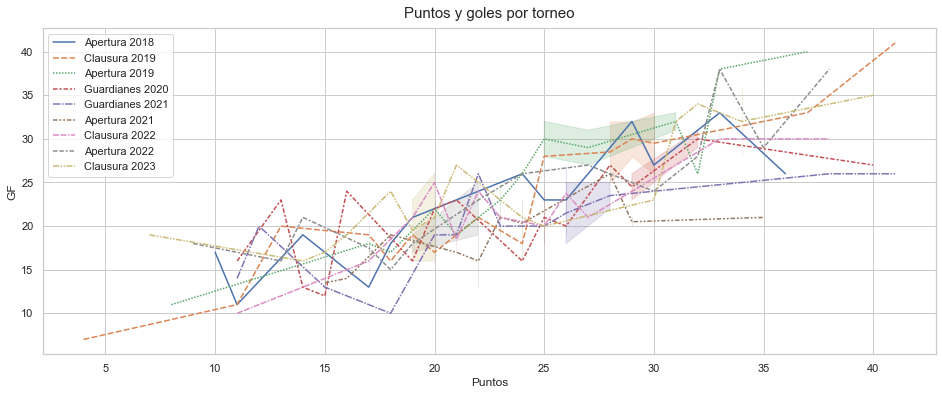

In [23]:
sns.set(style='whitegrid')
plt.figure(figsize=(16, 6))

ax = sns.lineplot(x='Puntos',y='GF',data=df_resume,hue='Torneo',style='Torneo')

ax.set_title('Puntos y goles por torneo', fontsize = 15, pad = 10)
ax.legend(loc=0);

plt.show()

#sns.lineplot(x = crosstab.columns, y = crosstab.loc['America'], ax=axes[0, 0])

Graficamos los puntos por equipo y por temporada, haciendo uso de crosstab.

In [24]:
crosstab = pd.crosstab(
    df_resume['Equipo'], 
    df_resume['Torneo'], 
    values = df_resume['Puntos'],
    aggfunc = 'sum'
).round(0).fillna(0)

In [25]:
crosstab

Torneo,Apertura 2018,Apertura 2019,Apertura 2021,Apertura 2022,Clausura 2019,Clausura 2022,Clausura 2023,Guardianes 2020,Guardianes 2021
Equipo,,,,,,,,,
America,33.0,31.0,35.0,38.0,29.0,26.0,34.0,32.0,38.0
Atlas,11.0,21.0,29.0,13.0,19.0,27.0,21.0,14.0,25.0
Atletico,0.0,20.0,20.0,18.0,0.0,23.0,19.0,11.0,12.0
Cruz Azul,36.0,23.0,23.0,24.0,30.0,25.0,24.0,29.0,41.0
FC Juarez,0.0,18.0,16.0,19.0,0.0,11.0,15.0,19.0,15.0
Guadalajara,20.0,25.0,22.0,22.0,18.0,26.0,34.0,26.0,23.0
Leon,18.0,33.0,29.0,22.0,41.0,21.0,30.0,40.0,26.0
Lobos BUAP,19.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0
Mazatlan,0.0,0.0,20.0,17.0,0.0,21.0,7.0,16.0,21.0


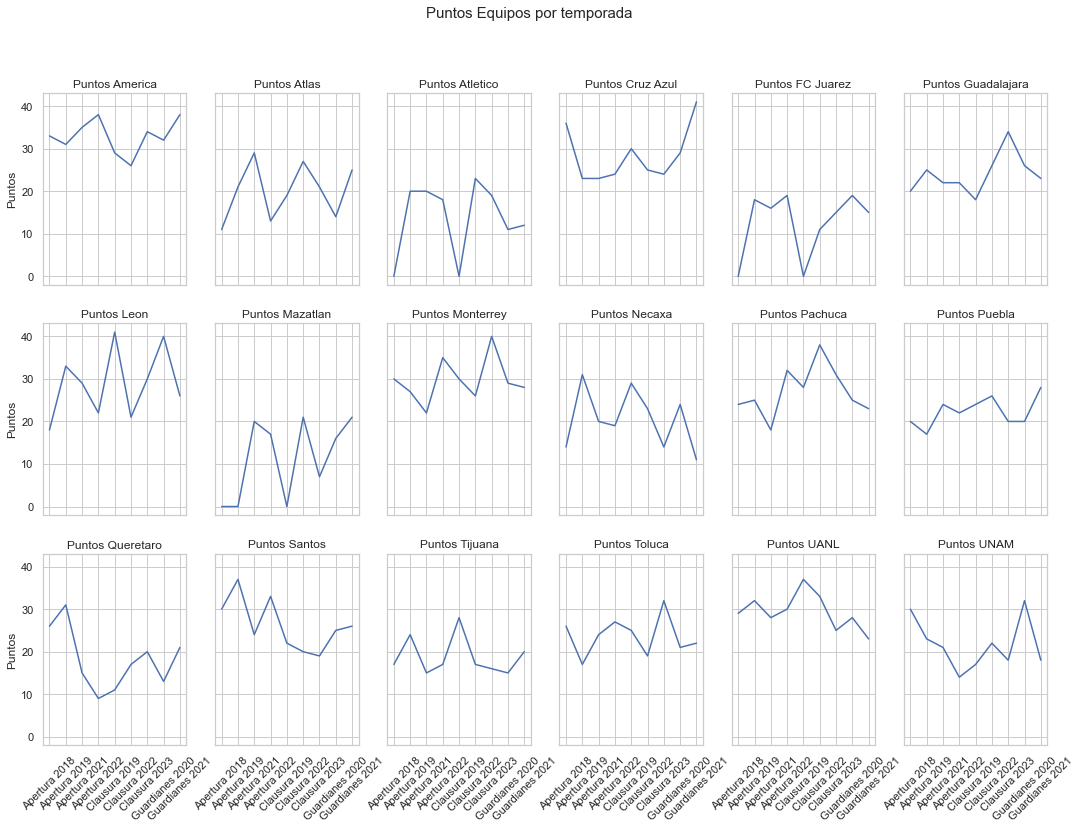

In [26]:
fig, axes = plt.subplots(3, 6, figsize=(18, 12), sharex=True, sharey=True)

sns.lineplot(x = crosstab.columns, y = crosstab.loc['America'], ax=axes[0, 0])
sns.lineplot(x = crosstab.columns, y = crosstab.loc['Atlas'], ax=axes[0, 1])
sns.lineplot(x = crosstab.columns, y = crosstab.loc['Atletico'], ax=axes[0, 2])
sns.lineplot(x = crosstab.columns, y = crosstab.loc['Cruz Azul'], ax=axes[0, 3])
sns.lineplot(x = crosstab.columns, y = crosstab.loc['FC Juarez'], ax=axes[0, 4])
sns.lineplot(x = crosstab.columns, y = crosstab.loc['Guadalajara'], ax=axes[0, 5])
sns.lineplot(x = crosstab.columns, y = crosstab.loc['Leon'], ax=axes[1, 0])
sns.lineplot(x = crosstab.columns, y = crosstab.loc['Mazatlan'], ax=axes[1, 1])
sns.lineplot(x = crosstab.columns, y = crosstab.loc['Monterrey'], ax=axes[1, 2])
sns.lineplot(x = crosstab.columns, y = crosstab.loc['Necaxa'], ax=axes[1, 3])
sns.lineplot(x = crosstab.columns, y = crosstab.loc['Pachuca'], ax=axes[1, 4])
sns.lineplot(x = crosstab.columns, y = crosstab.loc['Puebla'], ax=axes[1, 5])
sns.lineplot(x = crosstab.columns, y = crosstab.loc['Queretaro'], ax=axes[2, 0])
sns.lineplot(x = crosstab.columns, y = crosstab.loc['Santos'], ax=axes[2, 1])
sns.lineplot(x = crosstab.columns, y = crosstab.loc['Tijuana'], ax=axes[2, 2])
sns.lineplot(x = crosstab.columns, y = crosstab.loc['Toluca'], ax=axes[2, 3])
sns.lineplot(x = crosstab.columns, y = crosstab.loc['UANL'], ax=axes[2, 4])
sns.lineplot(x = crosstab.columns, y = crosstab.loc['UNAM'], ax=axes[2, 5])

axes[0, 0].set(xlabel='', ylabel='Puntos', title='Puntos America')
axes[0, 1].set(xlabel='', ylabel='', title='Puntos Atlas')
axes[0, 2].set(xlabel='', ylabel='', title='Puntos Atletico')
axes[0, 3].set(xlabel='', ylabel='', title='Puntos Cruz Azul')
axes[0, 4].set(xlabel='', ylabel='', title='Puntos FC Juarez')
axes[0, 5].set(xlabel='', ylabel='', title='Puntos Guadalajara')
axes[1, 0].set(xlabel='', ylabel='Puntos', title='Puntos Leon')
axes[1, 1].set(xlabel='', ylabel='', title='Puntos Mazatlan')
axes[1, 2].set(xlabel='', ylabel='', title='Puntos Monterrey')
axes[1, 3].set(xlabel='', ylabel='', title='Puntos Necaxa')
axes[1, 4].set(xlabel='', ylabel='', title='Puntos Pachuca')
axes[1, 5].set(xlabel='', ylabel='', title='Puntos Puebla')
axes[2, 0].set(xlabel='', ylabel='Puntos', title='Puntos Queretaro')
axes[2, 1].set(xlabel='', ylabel='', title='Puntos Santos')
axes[2, 2].set(xlabel='', ylabel='', title='Puntos Tijuana')
axes[2, 3].set(xlabel='', ylabel='', title='Puntos Toluca')
axes[2, 4].set(xlabel='', ylabel='', title='Puntos UANL')
axes[2, 5].set(xlabel='', ylabel='', title='Puntos UNAM')

#plt.xticks(rotation=45)
#ax.set_xticklabels(ax.get_xticks(), rotation = 45)
axes[2, 0].tick_params(axis='x', rotation=45)
axes[2, 1].tick_params(axis='x', rotation=45)
axes[2, 2].tick_params(axis='x', rotation=45)
axes[2, 3].tick_params(axis='x', rotation=45)
axes[2, 4].tick_params(axis='x', rotation=45)
axes[2, 5].tick_params(axis='x', rotation=45)

fig.suptitle('Puntos Equipos por temporada', fontsize=15);


Podemos observar el comportamiento que ha tenido cada equipo en los útltimos 10 torneos y concluimos que no existe regularidad en los equipos, tienen torneos buenos y al siguiente puede ser malo con poca cantidad de puntos

**Tablas de frecuencias**

In [27]:
puntos = df['Puntos']
segmento_puntos = pd.cut(puntos,10)
df['Puntos'].groupby(segmento_puntos).count()


Puntos
(3.963, 7.7]     3
(7.7, 11.4]     15
(11.4, 15.1]    32
(15.1, 18.8]    40
(18.8, 22.5]    70
(22.5, 26.2]    68
(26.2, 29.9]    46
(29.9, 33.6]    33
(33.6, 37.3]    11
(37.3, 41.0]     7
Name: Puntos, dtype: int64

Se observa que hay gran cantidad de datos en el rango de 15 a 30 puntos por torneo

In [28]:
ganados = df['PG']
segmento_pg = pd.cut(ganados,6)
df['PG'].groupby(segmento_pg).count()


PG
(-0.013, 2.167]    17
(2.167, 4.333]     71
(4.333, 6.5]       95
(6.5, 8.667]       96
(8.667, 10.833]    32
(10.833, 13.0]     14
Name: PG, dtype: int64

Podemos notar que la mayoria de los datos está en el rango de 5 a 9 partidos ganados por temporada

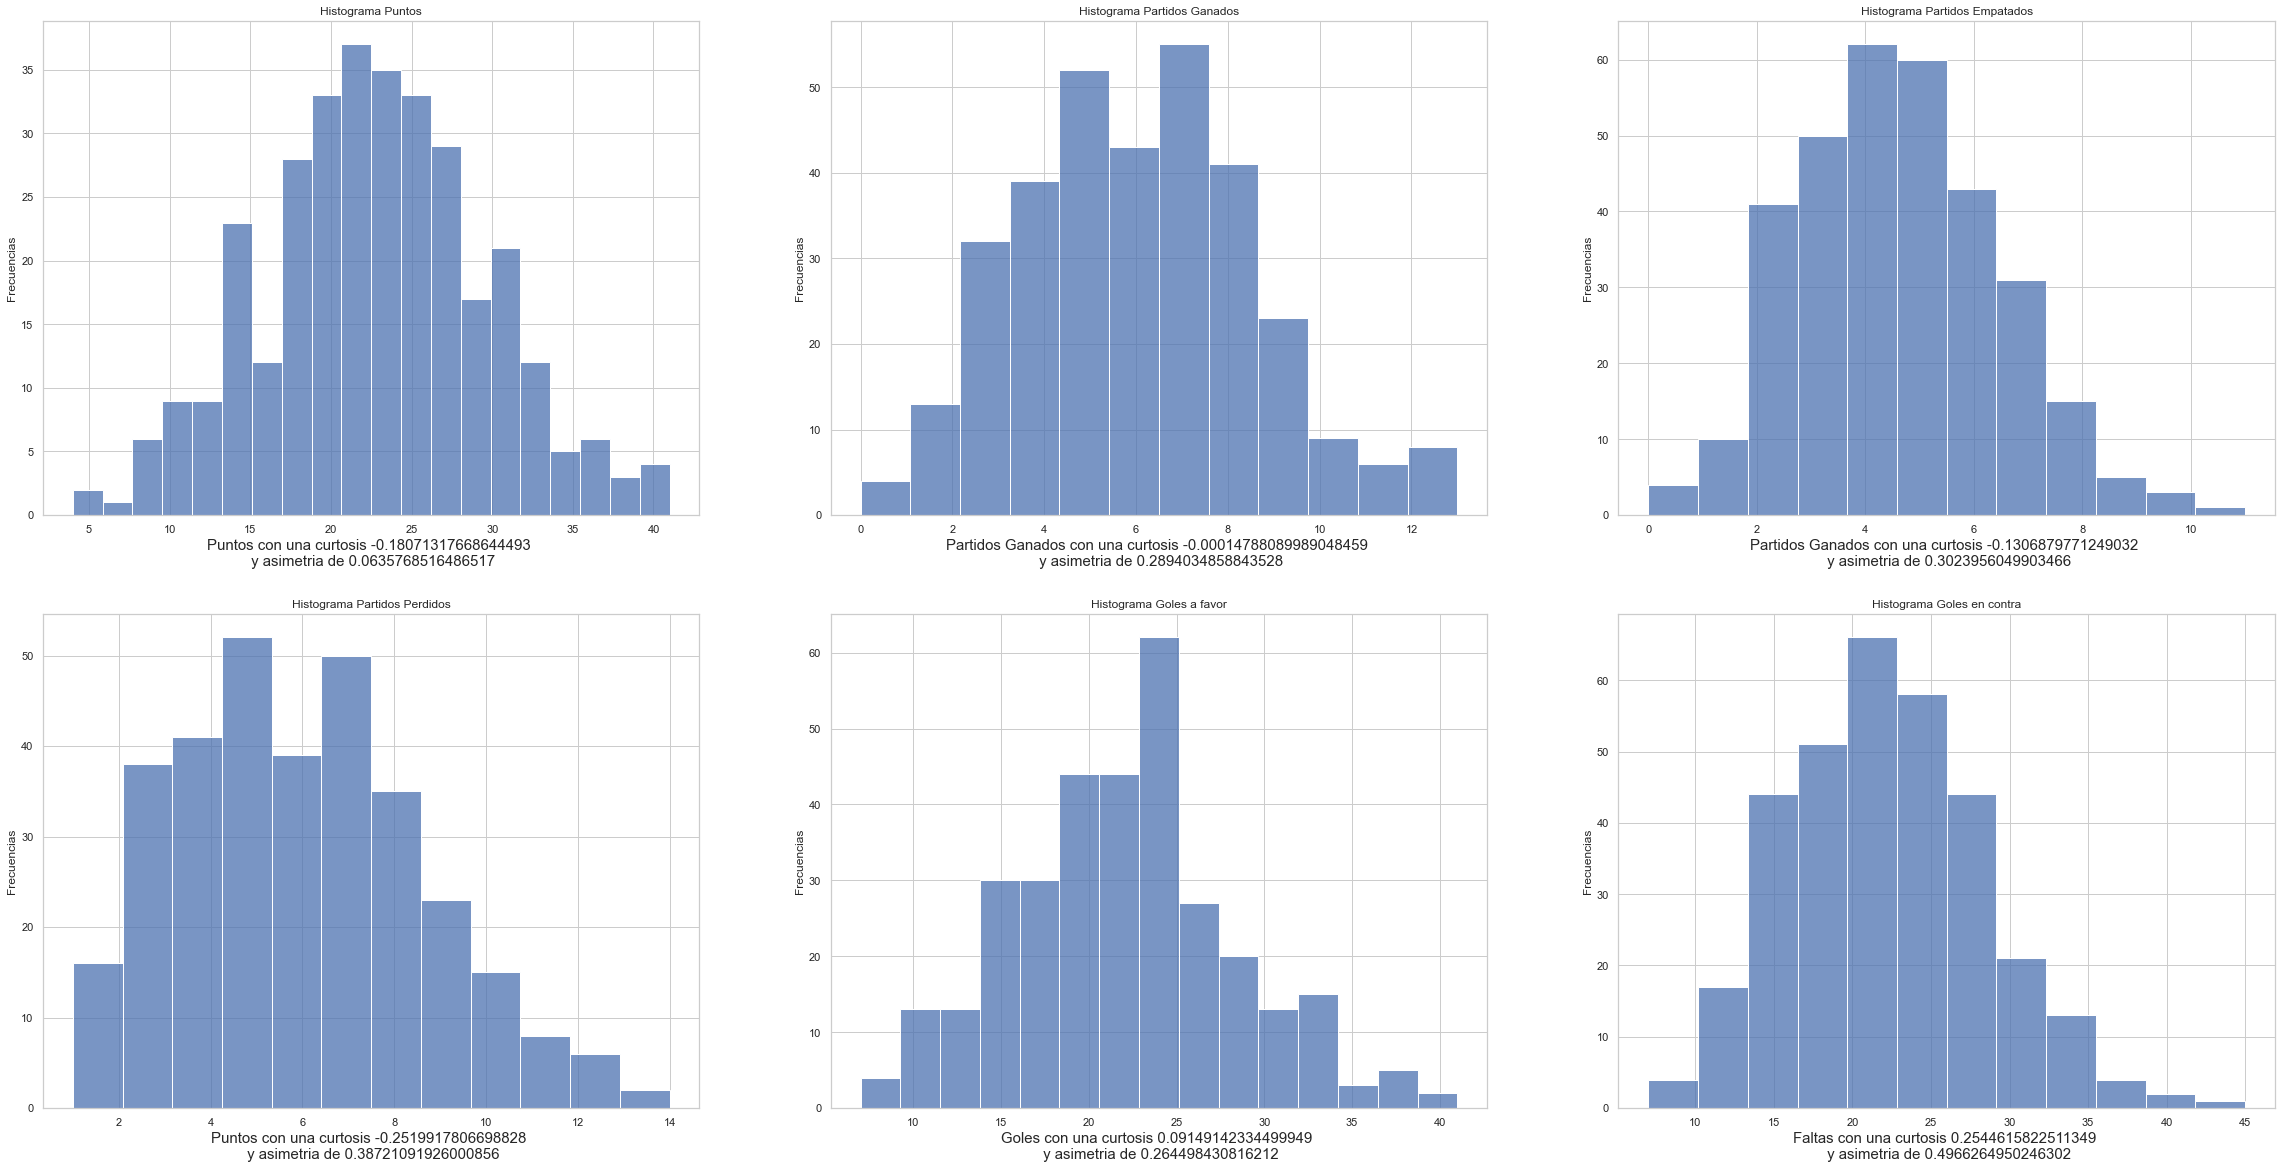

In [29]:
plt.figure(figsize=(40,20))

plt.subplot(2,3,1)
axe = sns.histplot(df['Puntos'], bins = 20)
axe.set(title = 'Histograma Puntos', ylabel = 'Frecuencias');
axe.set_xlabel(f'Puntos con una curtosis {kurtosis(df["Puntos"])} \n y asimetria de {skew(df["Puntos"])}', fontsize = 15);

plt.subplot(2,3,2)
axa = sns.histplot(df['PG'], bins = 12)
axa.set(title = 'Histograma Partidos Ganados', ylabel = 'Frecuencias');
axa.set_xlabel(f'Partidos Ganados con una curtosis {kurtosis(df["PG"])} \n y asimetria de {skew(df["PG"])}', fontsize = 15);

plt.subplot(2,3,3)
axi = sns.histplot(df['PE'], bins = 12)
axi.set(title = 'Histograma Partidos Empatados', ylabel = 'Frecuencias');
axi.set_xlabel(f'Partidos Ganados con una curtosis {kurtosis(df["PE"])} \n y asimetria de {skew(df["PE"])}', fontsize = 15);

plt.subplot(2,3,4)
axdp = sns.histplot(df['PP'], bins = 12)
axdp.set(title = 'Histograma Partidos Perdidos', ylabel = 'Frecuencias');
axdp.set_xlabel(f'Puntos con una curtosis {kurtosis(df["PP"])} \n y asimetria de {skew(df["PP"])}', fontsize = 15);

plt.subplot(2,3,5)
axg = sns.histplot(df['GF'], bins = 15)
axg.set(title = 'Histograma Goles a favor', ylabel = 'Frecuencias');
axg.set_xlabel(f'Goles con una curtosis {kurtosis(df["GF"])} \n y asimetria de {skew(df["GF"])}', fontsize = 15);

plt.subplot(2,3,6)
axed = sns.histplot(df['GC'], bins = 12)
axed.set(title = 'Histograma Goles en contra', ylabel = 'Frecuencias');
axed.set_xlabel(f'Faltas con una curtosis {kurtosis(df["GC"])} \n y asimetria de {skew(df["GC"])}', fontsize = 15);

Podemos observar que la mayoría de los datos parece tener una distribución normal

**Gráficas de densidad**

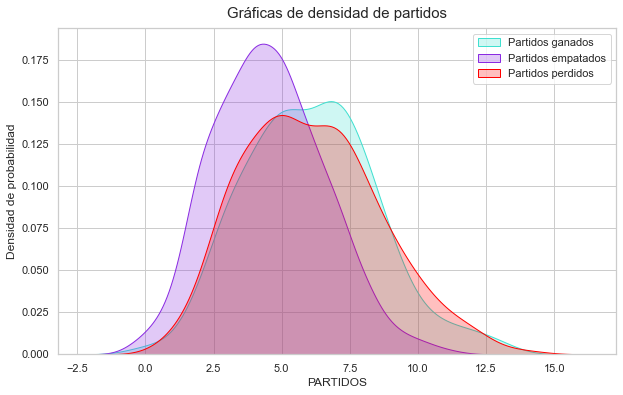

In [30]:
plt.figure(figsize=(10, 6))

ganados = df['PG']
empates = df['PE']
perdidos = df['PP']

ax = sns.distplot(ganados, hist = False, kde_kws = {'shade': True}, color='turquoise', label = "Partidos ganados")
ax = sns.distplot(empates, hist = False, kde_kws = {'shade': True}, color='blueviolet', label = 'Partidos empatados')
ax = sns.distplot(perdidos, hist = False, kde_kws = {'shade': True}, color='red', label = 'Partidos perdidos')

ax.set_title('Gráficas de densidad de partidos', fontsize = 15, pad = 10)
ax.set_ylabel('Densidad de probabilidad', size = 12)
ax.set_xlabel('PARTIDOS', size = 12)
ax.legend(loc=0);

En la gráfica podemos observar que son más los partidos empatados que los ganados o perdidos

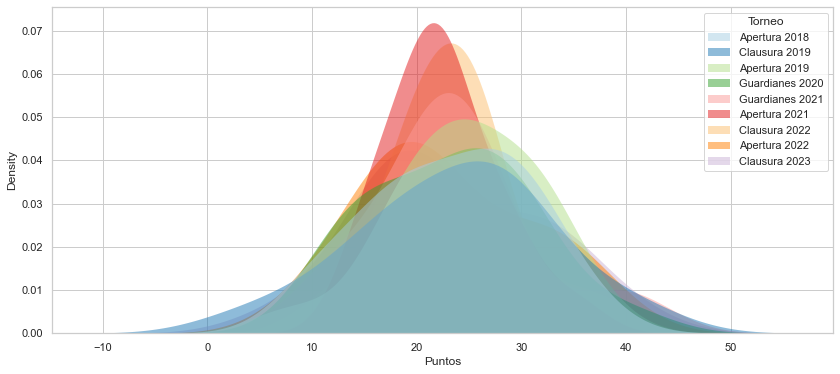

In [31]:
plt.figure(figsize=(14, 6))
sns.kdeplot(
   data=df_resume, x="Puntos", hue="Torneo",
   fill=True, common_norm=False, palette="Paired",
   alpha=.5, linewidth=0,
);

Gráfica donde se puede ver la cantidad de puntos por torneo, el Apertura 2021 fue donde hubo más cantidad de goles.

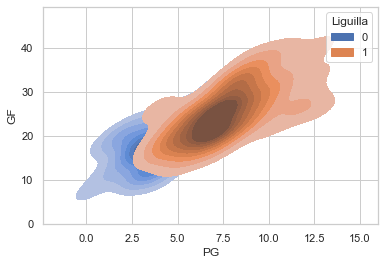

In [32]:
sns.kdeplot(
    data=df_resume, x="PG", y="GF", hue="Liguilla", fill=True,
);

Gráfico con los goles de los que clasifican a liguilla como los que no acceden a dicha fase. Se observa que los clasificados a la fase final son los equipos que hacen más anotaciones.

In [33]:
df.head()

,Torneo,Posicion,Equipo,PJ,PG,PE,PP,GF,GC,DG,Puntos,Puntos_TA,Posicion_TA,Posicion_cambio,Liguilla,Campeon
0,Apertura 2014,1,America,17,9,4,4,28,18,10,31,25,5,4,1,1
1,Apertura 2014,2,UANL,17,8,7,2,25,17,8,31,21,14,12,1,0
2,Apertura 2014,3,Atlas,17,9,4,4,22,20,2,31,21,12,9,1,0
3,Apertura 2014,4,Toluca,17,8,5,4,24,18,6,29,32,2,-2,1,0
4,Apertura 2014,5,Chiapas,17,7,7,3,24,20,4,28,23,9,4,1,0


**Violinplots**

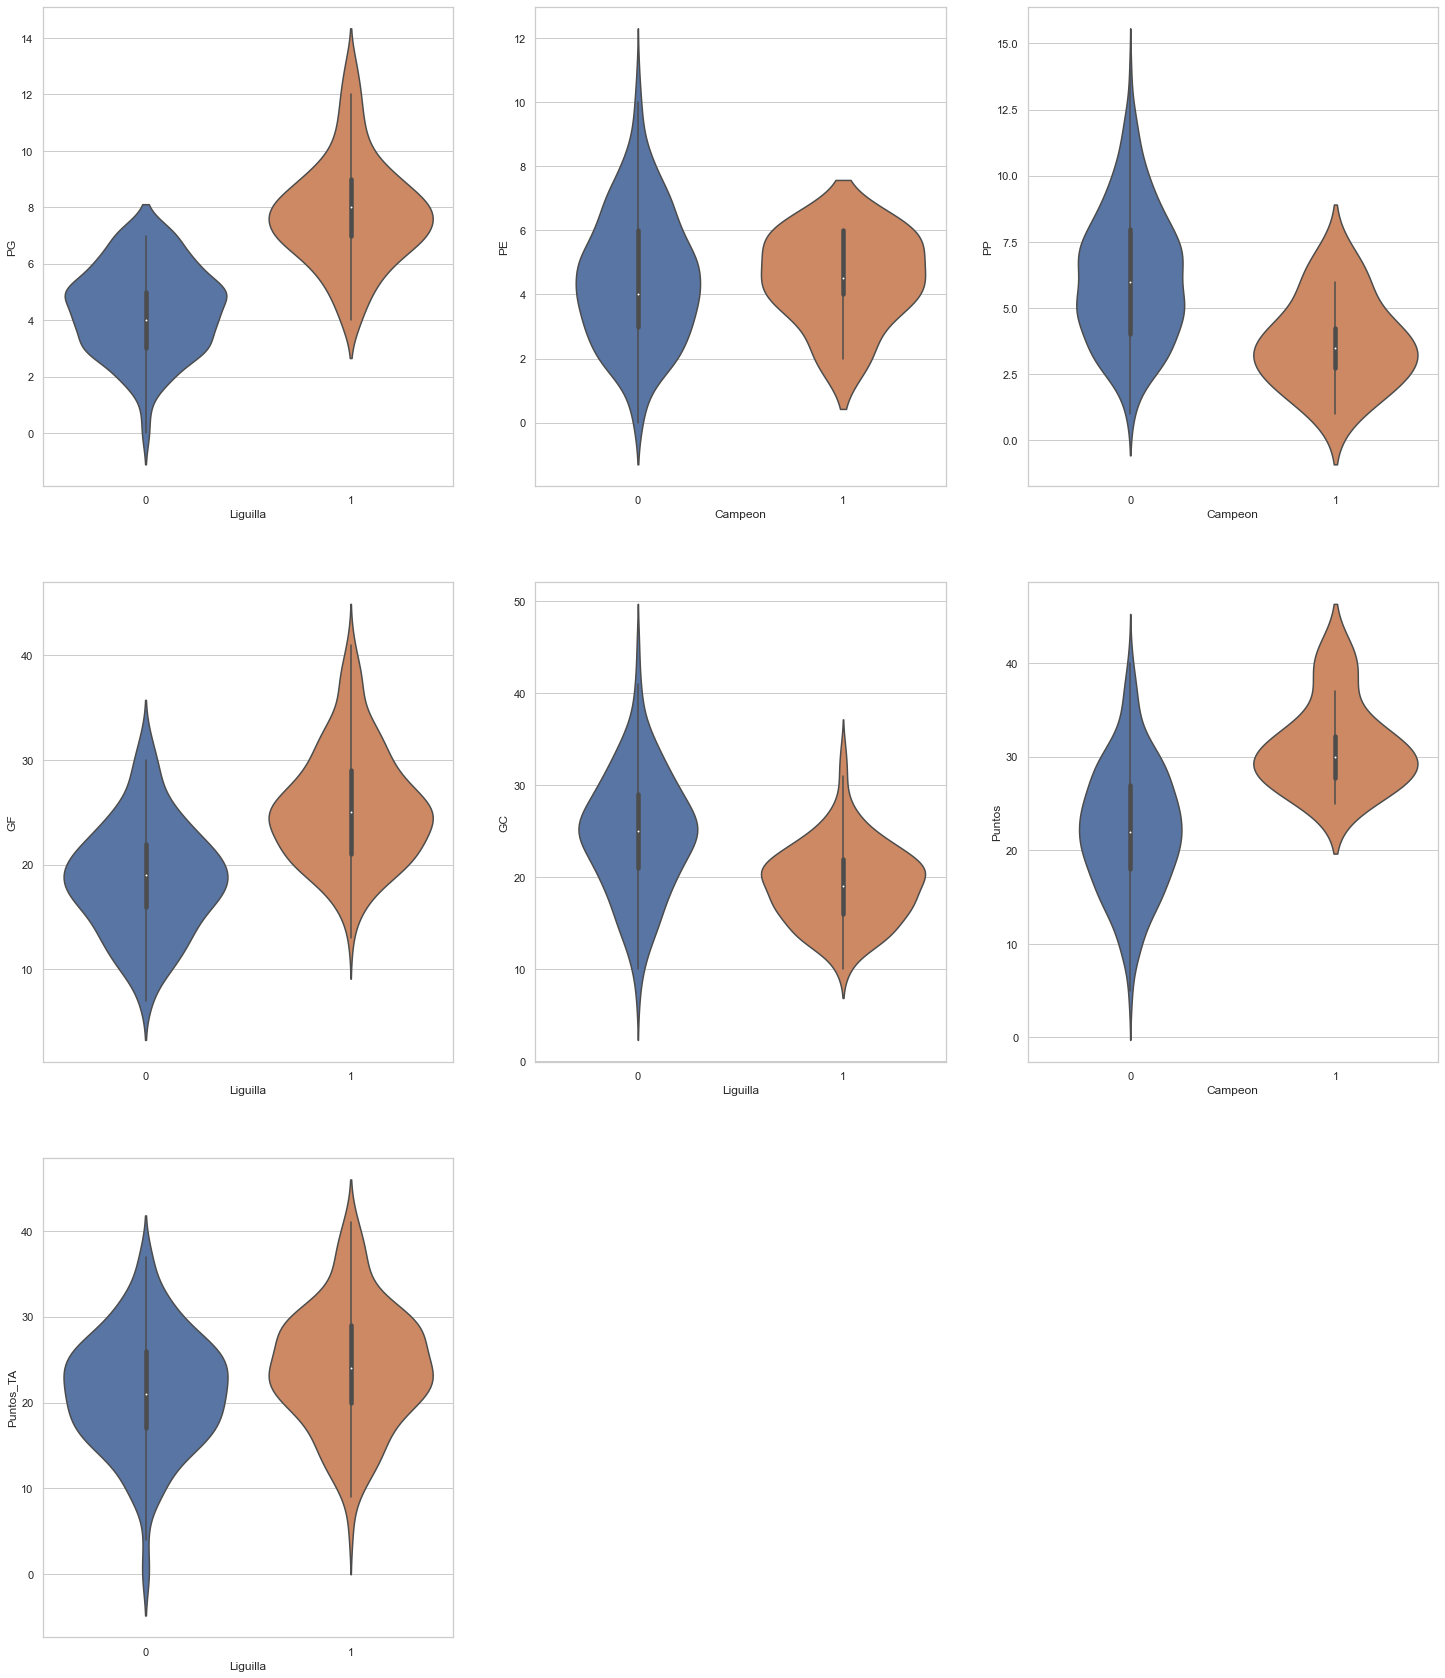

In [34]:
plt.figure(figsize=(25,30))

plt.subplot(3, 3, 1)
sns.violinplot(y = df['PG'], x = df['Liguilla']);

plt.subplot(3, 3, 2)
sns.violinplot(y = df['PE'], x = df['Campeon']);

plt.subplot(3, 3, 3)
sns.violinplot(y = df['PP'], x = df['Campeon']);

plt.subplot(3, 3, 4)
sns.violinplot(y = df['GF'], x = df['Liguilla']);

plt.subplot(3, 3, 5)
sns.violinplot(y = df['GC'], x = df['Liguilla']);

plt.subplot(3, 3, 6)
sns.violinplot(y = df['Puntos'], x = df['Campeon']);

plt.subplot(3, 3, 7)
sns.violinplot(y = df['Puntos_TA'], x = df['Liguilla']);



**Correlaciones**

In [35]:
df_resume.corr()

,Posicion,PJ,PG,PE,PP,GF,GC,DG,Puntos,Puntos_TA,Posicion_TA,Posicion_cambio,Liguilla,Campeon
Posicion,1.000000,3.070751e-02,-0.900779,-0.007422,0.882010,-0.748988,0.705025,-9.144440e-01,-0.949146,-0.439782,0.500706,-0.501159,-0.815160,-0.290585
PJ,0.030708,1.000000e+00,0.068274,-0.016925,0.066176,0.204069,0.203473,1.285382e-16,0.067498,0.018715,0.027531,-0.003238,-0.123957,0.005972
PG,-0.900779,6.827393e-02,1.000000,-0.318935,-0.737029,0.773972,-0.604114,8.665750e-01,0.970587,0.382561,-0.427692,0.474760,0.670537,0.296823
PE,-0.007422,-1.692493e-02,-0.318935,1.000000,-0.395293,-0.094608,-0.221141,7.987122e-02,-0.081375,0.087465,-0.094452,-0.086989,0.040679,-0.028958
PP,0.882010,6.617580e-02,-0.737029,-0.395293,1.000000,-0.659153,0.765387,-8.960449e-01,-0.875472,-0.429984,0.484207,-0.399460,-0.693436,-0.266642
GF,-0.748988,2.040688e-01,0.773972,-0.094608,-0.659153,1.000000,-0.264019,7.943135e-01,0.789878,0.343159,-0.354989,0.395389,0.531718,0.160892
GC,0.705025,2.034734e-01,-0.604114,-0.221141,0.765387,-0.264019,1.000000,-7.956659e-01,-0.691461,-0.346454,0.410133,-0.296224,-0.609126,-0.255264
DG,-0.914444,1.285382e-16,0.866575,0.079871,-0.896045,0.794314,-0.795666,1.000000e+00,0.931580,0.433727,-0.481265,0.434891,0.717591,0.261823
Puntos,-0.949146,6.749775e-02,0.970587,-0.081375,-0.875472,0.789878,-0.691461,9.315804e-01,1.000000,0.424519,-0.473754,0.477161,0.715471,0.304783
Puntos_TA,-0.439782,1.871505e-02,0.382561,0.087465,-0.429984,0.343159,-0.346454,4.337267e-01,0.424519,1.000000,-0.863329,-0.422533,0.285042,0.201793


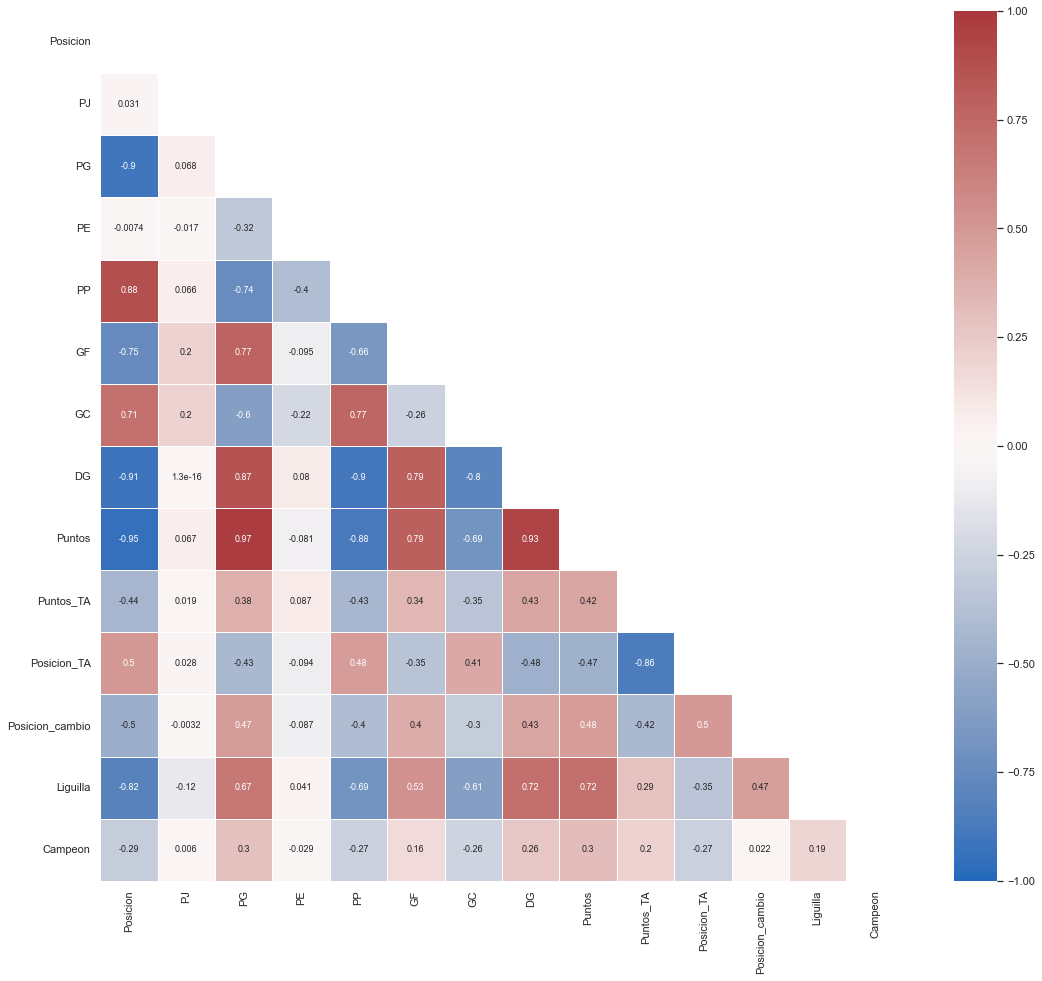

In [36]:
fig = plt.figure(figsize = (18,16))
mask = np.triu(np.ones_like(df_resume.corr(), dtype=bool))
ax = sns.heatmap(df_resume.corr(), mask = mask, vmin = -1, vmax = 1, annot = True, cmap = 'vlag', lw = 0.8, annot_kws = {"size": 9})

**Correlaciones Importantes**

*   Puntos y Partidos Ganados  .97
*   Puntos y diferencia de goles .93
*   Posicion y partidos perdidos .88
*   Puntos y Goles a favor   .79
*   Partidos Ganados y goles a favor .77
*   Partidos Perdidos y goles en contra .77


**Correlaciones negativas**
*   Puntos y posicion - .95
*   Puntos y partidos perdidos - .88
*   Partidos perdidos y diferencia de goles - .9
*   Puntos y goles en contra - .69

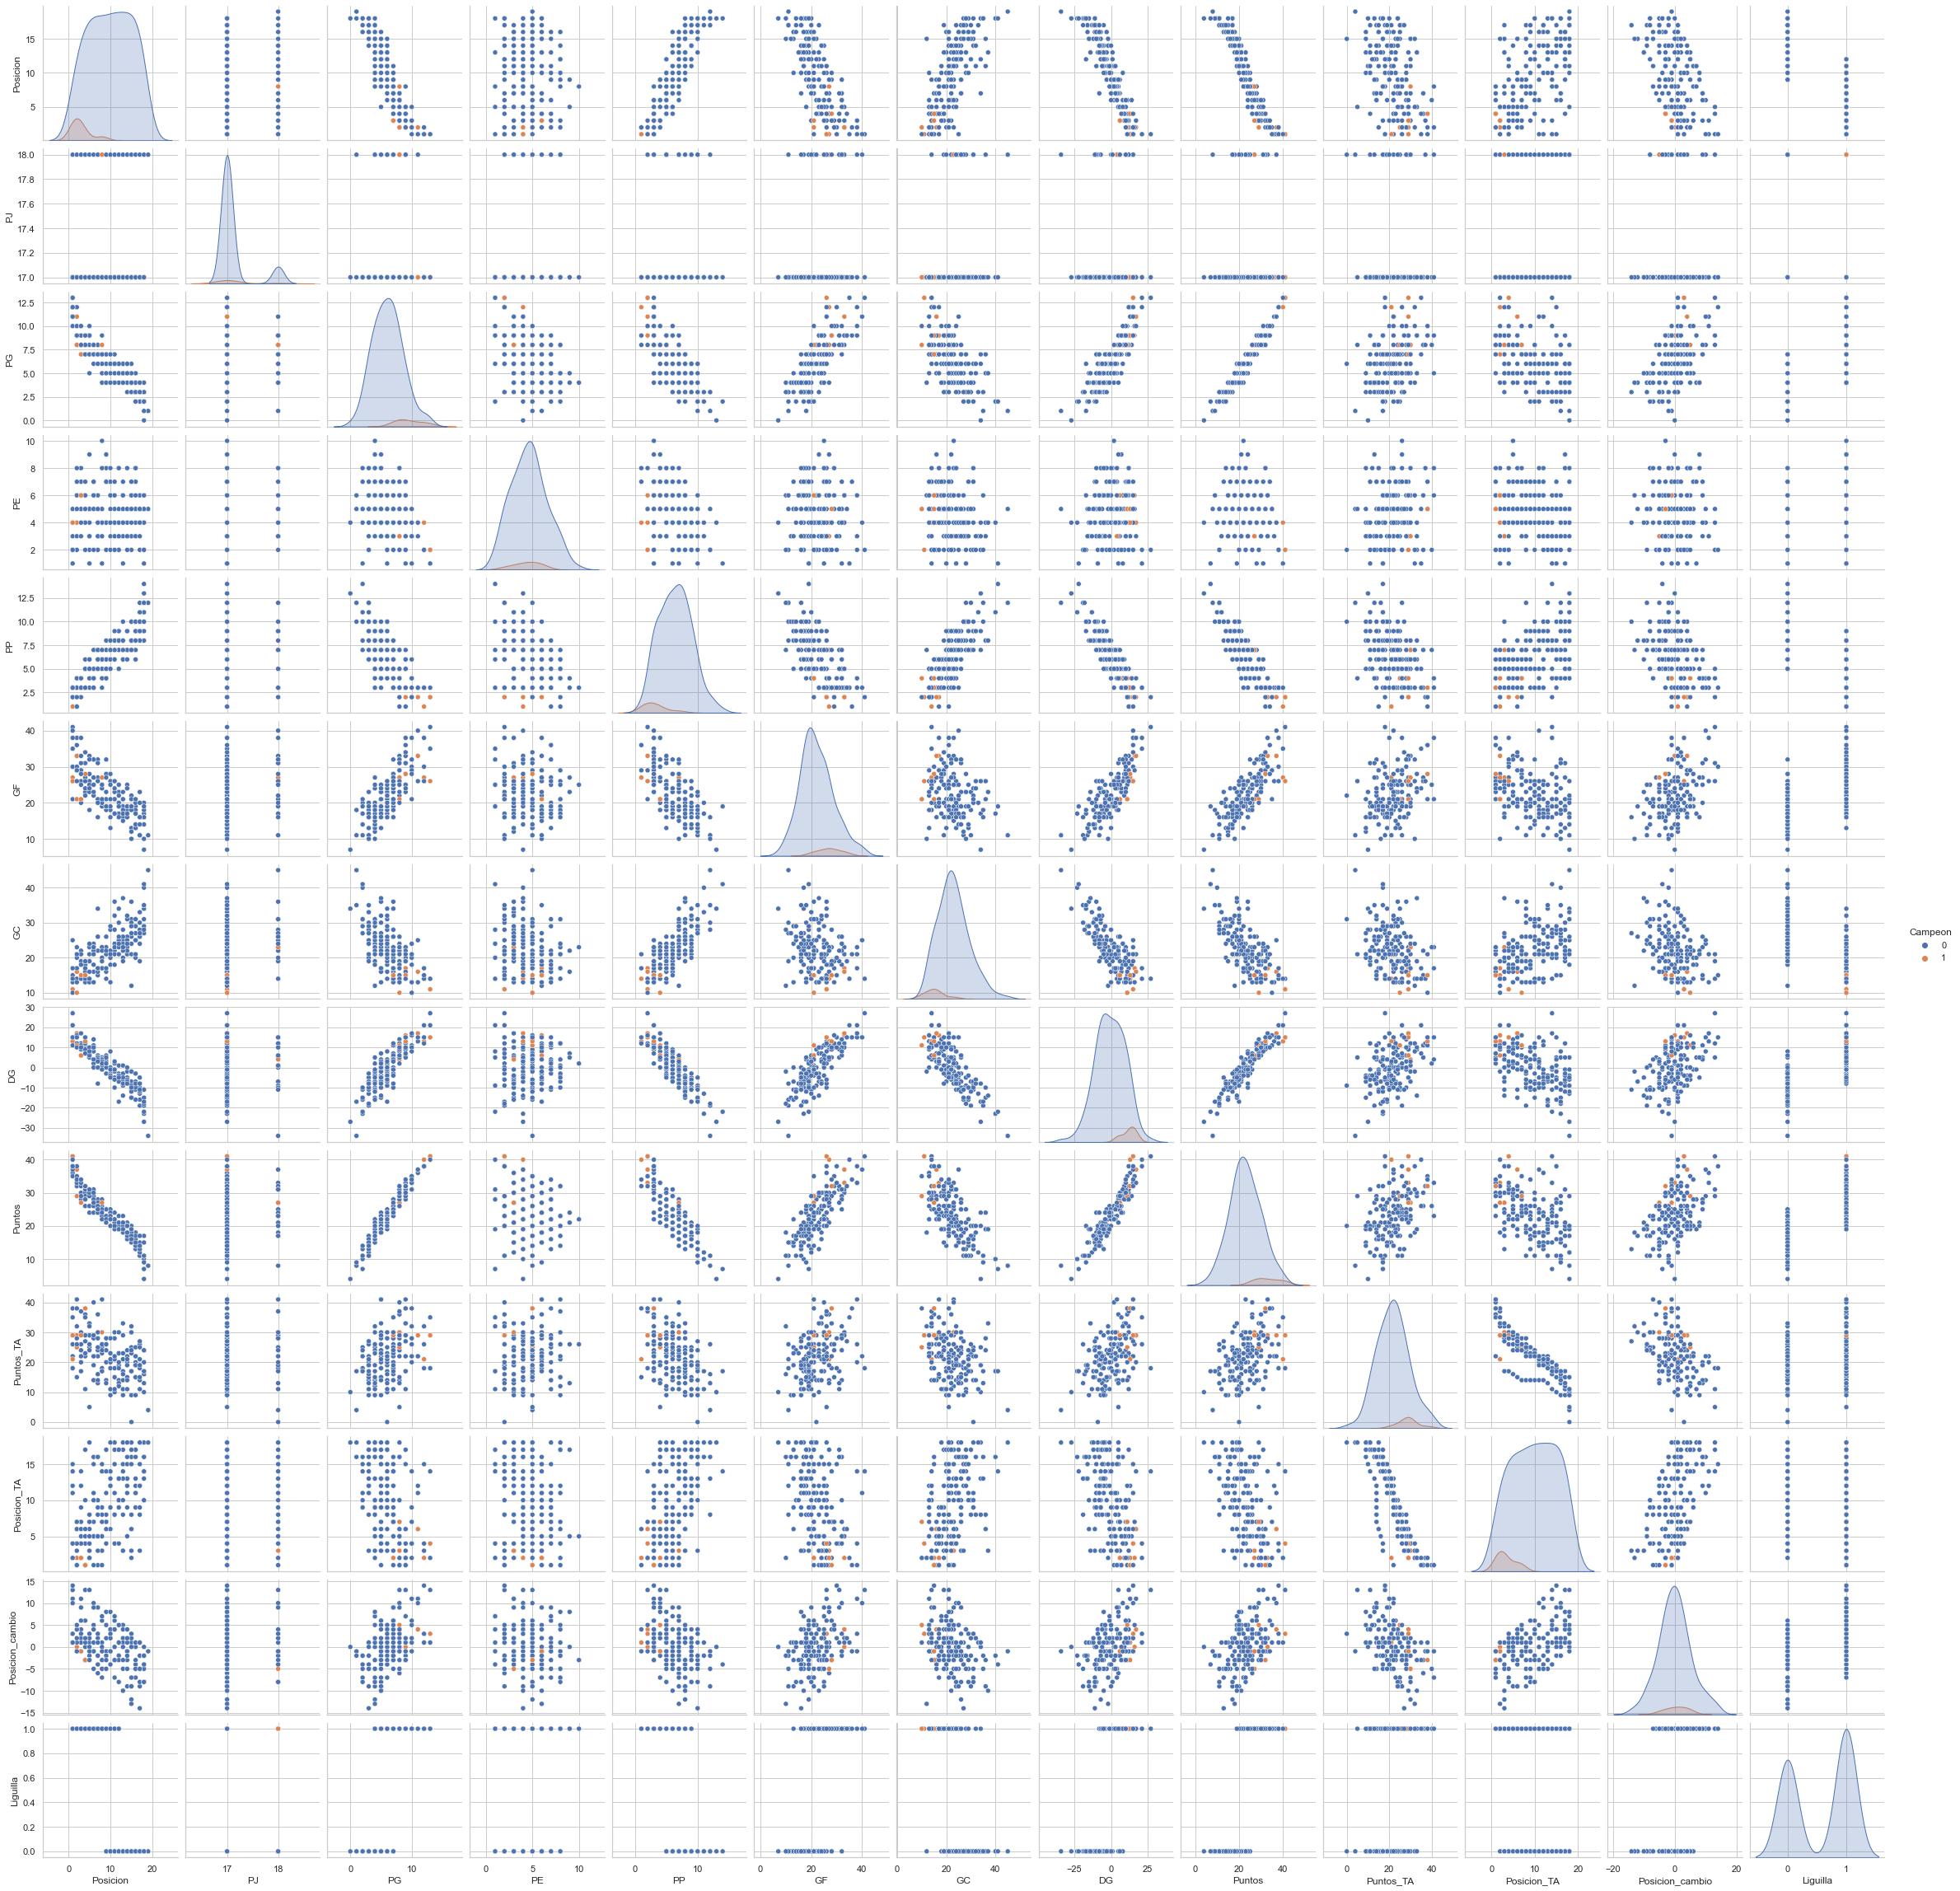

In [37]:
sns.pairplot(df_resume,hue="Campeon")
plt.show()

Relación entre Partidos ganados y puntos

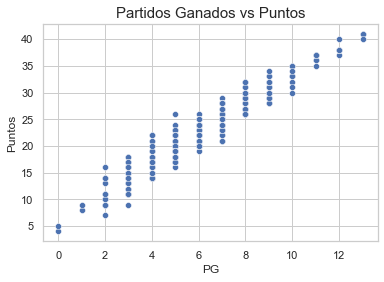

In [38]:
scplt = sns.scatterplot(x=df['PG'], y=df['Puntos'])
scplt.set_title('Partidos Ganados vs Puntos', fontsize=15);

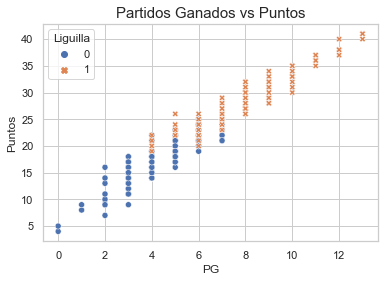

In [39]:
scplt = sns.scatterplot(x=df['PG'], y=df['Puntos'], hue=df['Liguilla'], style=df['Liguilla'])
scplt.set_title('Partidos Ganados vs Puntos', fontsize=15);

En este gráfico podemos ver la relación que existe entre puntos y partidos ganados la cual es una fuerte relación ya que a mayor cantidad de partidos ganados mas puntos y por lo tanto existe posibilidad de clasificar a la liguilla.

Relacion entre puntos y goles a favor

In [40]:
df.head()

,Torneo,Posicion,Equipo,PJ,PG,PE,PP,GF,GC,DG,Puntos,Puntos_TA,Posicion_TA,Posicion_cambio,Liguilla,Campeon
0,Apertura 2014,1,America,17,9,4,4,28,18,10,31,25,5,4,1,1
1,Apertura 2014,2,UANL,17,8,7,2,25,17,8,31,21,14,12,1,0
2,Apertura 2014,3,Atlas,17,9,4,4,22,20,2,31,21,12,9,1,0
3,Apertura 2014,4,Toluca,17,8,5,4,24,18,6,29,32,2,-2,1,0
4,Apertura 2014,5,Chiapas,17,7,7,3,24,20,4,28,23,9,4,1,0


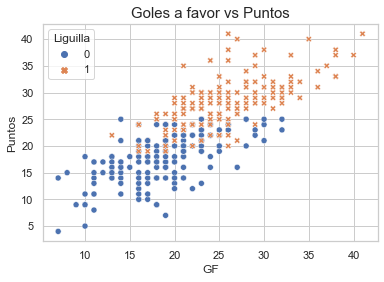

In [41]:
scplt = sns.scatterplot(x=df['GF'], y=df['Puntos'], hue=df['Liguilla'], style=df['Liguilla'])
scplt.set_title('Goles a favor vs Puntos', fontsize=15);

Relación negativa entre puntos y partidos perdidos

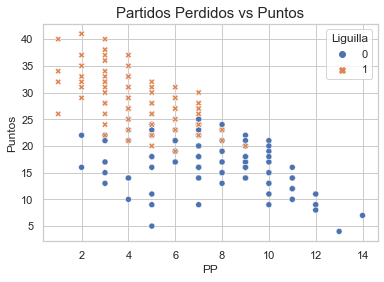

In [42]:
scplt = sns.scatterplot(x=df['PP'], y=df['Puntos'], hue=df['Liguilla'], style=df['Liguilla'])
scplt.set_title('Partidos Perdidos vs Puntos', fontsize=15);

Relacion negativa entre puntos y posición

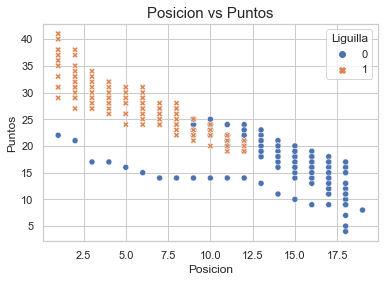

In [43]:
scplt = sns.scatterplot(x=df['Posicion'], y=df['Puntos'], hue=df['Liguilla'], style=df['Liguilla'])
scplt.set_title('Posicion vs Puntos', fontsize=15);

## 4. Machine Learning

In [44]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

#### Preparando el dataset para los diferentes modelos

Pasamos una copia de df_ml que previamente se habia preparado al dataframe **df** para un mejor control de las sentencias.

In [45]:
df = df_ml

Se van a aplicar distintos modelos al dataframe para que al final se comparen los resultados y se escoja el que mejores resultados arroje.

Para estos modelos se crearán columnas con base en la correlación existente entre los puntos tanto del equipo local como visitante así como la posición de ambos equipos.

In [46]:
df.head()

,Temporada,Torneo,Fase,Jornada,Fecha,Local,Marcador,Visitante,Asistencia,Sedes,...,Puntos_local,Puntos_TA_local,Posicion_local,Posicion_TA_local,Posicion_cambio_local,Puntos_visitante,Puntos_TA_visitante,Posicion_visitante,Posicion_TA_visitante,Posicion_cambio_visitante
0,2014-2015,Apertura 2014,Temporada Regular,1.0,2014-07-19,Cruz Azul,0–1,Pachuca,NaN,Estadio Azul,...,21,36,13,1,-12,25,24,7,6,-1
1,2014-2015,Apertura 2014,Temporada Regular,3.0,2014-08-01,Queretaro,2–0,Pachuca,NaN,Estadio La Corregidora,...,21,21,12,13,1,25,24,7,6,-1
2,2014-2015,Apertura 2014,Temporada Regular,5.0,2014-08-17,Toluca,3–0,Pachuca,NaN,Estadio Nemesio Diez,...,29,32,4,2,-2,25,24,7,6,-1
3,2014-2015,Apertura 2014,Temporada Regular,7.0,2014-08-30,Leon,1–2,Pachuca,NaN,Estadio Leon,...,22,23,10,8,-2,25,24,7,6,-1
4,2014-2015,Apertura 2014,Temporada Regular,15.0,2014-11-01,Puebla,1–1,Pachuca,NaN,Estadio Cuauhtemoc,...,16,18,15,16,1,25,24,7,6,-1


Obtenemos las columnas entre las diferencias de posición de local y de visita, la diferencias de goles así como los puntos entre la posición, estos campos se agregan al dataframe original **df**

In [47]:
df["Dif_posicion"] = df["Posicion_local"] - df["Posicion_visitante"]
df["Dif_goles"] = df["GolesLocal"] - df["GolesVisitante"]
df["Puntos_Local_Pos"] = df["PuntosLocal"]/df["Posicion_visitante"]
df["Puntos_Visita_Pos"] = df["PuntosVisitante"]/df["Posicion_local"]

Separamos en local y visita para calcular los valores de los partidos pasados, luego se vuelven a juntar para tener el dataset original

In [48]:
df_local = df [["Torneo","Local","GolesLocal","GolesVisitante","Posicion_local","Posicion_visitante","Posicion_cambio_local","Puntos_local","Resultado","Dif_posicion","Puntos_Local_Pos","PuntosLocal"]]

df_visita = df [["Torneo","Visitante","GolesVisitante","GolesLocal","Posicion_visitante","Posicion_local","Posicion_cambio_visitante","Puntos_visitante","Resultado","Dif_posicion","Puntos_Visita_Pos","PuntosVisitante"]]

In [49]:
df_local.head()

,Torneo,Local,GolesLocal,GolesVisitante,Posicion_local,Posicion_visitante,Posicion_cambio_local,Puntos_local,Resultado,Dif_posicion,Puntos_Local_Pos,PuntosLocal
0,Apertura 2014,Cruz Azul,0,1,13,7,-12,21,1,6,0.000000,0
1,Apertura 2014,Queretaro,2,0,12,7,1,21,0,5,0.428571,3
2,Apertura 2014,Toluca,3,0,4,7,-2,29,0,-3,0.428571,3
3,Apertura 2014,Leon,1,2,10,7,-2,22,1,3,0.000000,0
4,Apertura 2014,Puebla,1,1,15,7,1,16,2,8,0.142857,1


In [50]:
df_visita.head()

,Torneo,Visitante,GolesVisitante,GolesLocal,Posicion_visitante,Posicion_local,Posicion_cambio_visitante,Puntos_visitante,Resultado,Dif_posicion,Puntos_Visita_Pos,PuntosVisitante
0,Apertura 2014,Pachuca,1,0,7,13,-1,25,1,6,0.230769,3
1,Apertura 2014,Pachuca,0,2,7,12,-1,25,0,5,0.000000,0
2,Apertura 2014,Pachuca,0,3,7,4,-1,25,0,-3,0.000000,0
3,Apertura 2014,Pachuca,2,1,7,10,-1,25,1,3,0.300000,3
4,Apertura 2014,Pachuca,1,1,7,15,-1,25,2,8,0.066667,1


In [51]:
columnas = ['Torneo','Equipo','Goles','Goles_V','Posicion','Posicion_V','Posicion_cambio','PuntosTotal','Resultado','Dif_posicion','Puntos_Pos','Puntos']

df_local.columns = columnas
df_visita.columns = columnas

In [52]:
equipo_estadisticas = df_local.append(df_visita)

In [53]:
df_equipo_estadisticas = equipo_estadisticas.copy()

Teniendo el dataset **df_equipo_estadisticas** para para crear las variables que nos ayudarán en la predición

- Promedio de goles marcados del equipo en los últimos 10 torneos
- Promedio de goles marcados del equipo en la temporada actual
- Promedio de goles recibidos del equipo en los últimos 10 torneos
- Promedio de goles recibidos del equipo en la temporada actual
- Promedio de posicion de los equipos enfrentados en los últimos 10 torneos
- Promedio de posicion de los equipos enfrentados en la temporada actual
- Puntos ganados en los últimos 10 torneos
- Puntos ganados en en la temporada actual
- Promedio de puntos ganados en los últimos 10 torneos
- Promedio de puntos ganados en en la temporada actual
- Promedio de puntos por posicion en los últimos 10 torneos
- Promedio de puntos por posicion en la temporada actual

In [54]:
nomultimos10 = ['Apertura 2018', 'Clausura 2019', 'Apertura 2019', 'Guardianes 2020', 'Guardianes 2021', 'Apertura 2021',
       'Clausura 2022', 'Apertura 2022', 'Clausura 2023']

Obtenemos los promedios de las variables indicadas y se agregan al dataset

In [55]:
estadisticas_valores = []

for index, row in equipo_estadisticas.iterrows():
    equipo = row["Equipo"]
    torneo = row["Torneo"]
    
    ultimos10 = equipo_estadisticas.loc[(equipo_estadisticas["Equipo"] == equipo) & (equipo_estadisticas.Torneo.isin(nomultimos10))]#.sort_values(by=['Equipo'], ascending=False)
    tempActual = ultimos10.loc[ultimos10['Torneo']=='Clausura 2023']
    
    #print("Buscando: ", equipo)
    #print(ultimos10.shape)
    #print("a", tempActual.shape)
    
    goles10t = ultimos10['Goles'].mean()
    golestem = tempActual['Goles'].mean()
    
    golesV10t = ultimos10['Goles_V'].mean()
    golesVtem = tempActual['Goles_V'].mean()
    
    poscV10t = ultimos10['Posicion_V'].mean()
    poscVtem = tempActual['Posicion_V'].mean()
    
    pts10t = ultimos10['PuntosTotal'].mean()
    ptstem = tempActual['PuntosTotal'].mean()
    
    ptsXpar10t = ultimos10['Puntos'].mean()
    ptsXpartem = tempActual['Puntos'].mean()
    
    ptsPos10t = ultimos10['Puntos_Pos'].mean()
    ptsPostem = tempActual['Puntos_Pos'].mean()
    
    estadisticas_valores.append([goles10t,golestem,golesV10t,golesVtem,poscV10t,poscVtem,pts10t,ptstem,ptsXpar10t,ptsXpartem,ptsPos10t,ptsPostem])
    


In [56]:
col_estadisticas = ["prom_goles10t", "prom_golestem", "prom_golesV10t", "prom_golesVtem", "prom_poscV10t", "prom_poscVtem", "prom_pts10t", "prom_ptstem", "prom_ptsXpar10t", "prom_ptsXpartem", "prom_ptsPos10t", "prom_ptsPostem"]

estadist_df = pd.DataFrame(estadisticas_valores, columns=col_estadisticas)

df_todo_est = pd.concat([equipo_estadisticas.reset_index(drop=True), estadist_df], axis=1, ignore_index=False)

In [57]:
df_todo_est = df_todo_est.fillna(0)

In [58]:
# Revisamos que no tengamos datos vacíos
df_todo_est.isna().sum()

Torneo             0
Equipo             0
Goles              0
Goles_V            0
Posicion           0
Posicion_V         0
Posicion_cambio    0
PuntosTotal        0
Resultado          0
Dif_posicion       0
Puntos_Pos         0
Puntos             0
prom_goles10t      0
prom_golestem      0
prom_golesV10t     0
prom_golesVtem     0
prom_poscV10t      0
prom_poscVtem      0
prom_pts10t        0
prom_ptstem        0
prom_ptsXpar10t    0
prom_ptsXpartem    0
prom_ptsPos10t     0
prom_ptsPostem     0
dtype: int64

In [59]:
df_todo_est_loc = df_todo_est.iloc[:int(df_todo_est.shape[0]/2),:]
df_todo_est_vis = df_todo_est.iloc[int(df_todo_est.shape[0]/2):,:]


In [60]:
df_todo_est_loc.columns[-12:]

Index(['prom_goles10t', 'prom_golestem', 'prom_golesV10t', 'prom_golesVtem',
       'prom_poscV10t', 'prom_poscVtem', 'prom_pts10t', 'prom_ptstem',
       'prom_ptsXpar10t', 'prom_ptsXpartem', 'prom_ptsPos10t',
       'prom_ptsPostem'],
      dtype='object')

In [61]:
df_todo_est_loc = df_todo_est_loc[df_todo_est_loc.columns[-12:]]
df_todo_est_vis = df_todo_est_vis[df_todo_est_vis.columns[-12:]]

Ya que se crearon las columnas para el análisis tanto para local como visitante es necesario diferenciarlos en el nombre por lo que agregamos los sufijos **_local** y **_visita** a las columnas

In [62]:
#In order to unify the database, is needed to add home and away suffix for each column. After that, the data is ready to be merged
df_todo_est_loc.columns = [str(col)+'_local' for col in df_todo_est_loc.columns]
df_todo_est_vis.columns = [str(col)+'_visita' for col in df_todo_est_vis.columns]

In [63]:
df_todo_est_vis.head()

,prom_goles10t_visita,prom_golestem_visita,prom_golesV10t_visita,prom_golesVtem_visita,prom_poscV10t_visita,prom_poscVtem_visita,prom_pts10t_visita,prom_ptstem_visita,prom_ptsXpar10t_visita,prom_ptsXpartem_visita,prom_ptsPos10t_visita,prom_ptsPostem_visita
2953,1.579545,1.882353,1.153409,1.411765,8.982955,9.764706,27.494318,31.0,1.607955,1.823529,0.264221,0.243044
2954,1.579545,1.882353,1.153409,1.411765,8.982955,9.764706,27.494318,31.0,1.607955,1.823529,0.264221,0.243044
2955,1.579545,1.882353,1.153409,1.411765,8.982955,9.764706,27.494318,31.0,1.607955,1.823529,0.264221,0.243044
2956,1.579545,1.882353,1.153409,1.411765,8.982955,9.764706,27.494318,31.0,1.607955,1.823529,0.264221,0.243044
2957,1.579545,1.882353,1.153409,1.411765,8.982955,9.764706,27.494318,31.0,1.607955,1.823529,0.264221,0.243044


In [64]:
estadisticas_partido = pd.concat([df_todo_est_loc,df_todo_est_vis.reset_index(drop=True)], axis=1, ignore_index=False)

Juntamos los datasets para obtener el final con las columnas calculadas

In [65]:
df_todo_est = pd.concat([df,estadisticas_partido.reset_index(drop=True)], axis=1, ignore_index=False)

In [66]:
df_todo_est.columns

Index(['Temporada', 'Torneo', 'Fase', 'Jornada', 'Fecha', 'Local', 'Marcador',
       'Visitante', 'Asistencia', 'Sedes', 'GolesLocal', 'GolesVisitante',
       'Resultado', 'PuntosLocal', 'PuntosVisitante', 'Puntos_local',
       'Puntos_TA_local', 'Posicion_local', 'Posicion_TA_local',
       'Posicion_cambio_local', 'Puntos_visitante', 'Puntos_TA_visitante',
       'Posicion_visitante', 'Posicion_TA_visitante',
       'Posicion_cambio_visitante', 'Dif_posicion', 'Dif_goles',
       'Puntos_Local_Pos', 'Puntos_Visita_Pos', 'prom_goles10t_local',
       'prom_golestem_local', 'prom_golesV10t_local', 'prom_golesVtem_local',
       'prom_poscV10t_local', 'prom_poscVtem_local', 'prom_pts10t_local',
       'prom_ptstem_local', 'prom_ptsXpar10t_local', 'prom_ptsXpartem_local',
       'prom_ptsPos10t_local', 'prom_ptsPostem_local', 'prom_goles10t_visita',
       'prom_golestem_visita', 'prom_golesV10t_visita',
       'prom_golesVtem_visita', 'prom_poscV10t_visita', 'prom_poscVtem_visita',
 

In [67]:
df_todo_est.head().T

,0,1,2,3,4
Temporada,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015
Torneo,Apertura 2014,Apertura 2014,Apertura 2014,Apertura 2014,Apertura 2014
Fase,Temporada Regular,Temporada Regular,Temporada Regular,Temporada Regular,Temporada Regular
Jornada,1.0,3.0,5.0,7.0,15.0
Fecha,2014-07-19 00:00:00,2014-08-01 00:00:00,2014-08-17 00:00:00,2014-08-30 00:00:00,2014-11-01 00:00:00
Local,Cruz Azul,Queretaro,Toluca,Leon,Puebla
Marcador,0–1,2–0,3–0,1–2,1–1
Visitante,Pachuca,Pachuca,Pachuca,Pachuca,Pachuca
Asistencia,NaN,NaN,NaN,NaN,NaN
Sedes,Estadio Azul,Estadio La Corregidora,Estadio Nemesio Diez,Estadio Leon,Estadio Cuauhtemoc


Creamos una función para diferenciar el tipo de partido, si es de temporada regular o de liguilla, ya que también se hará uso de este campo para los distintos modelos

In [68]:
def TipoPartido(x):
    if x == "Temporada Regular":
        return 0
    else:
        return 1
    
df_todo_est['Tipo_Partido'] = df_todo_est["Fase"].apply(lambda x: TipoPartido(x))

In [69]:
df_todo_est = pd.get_dummies(df_todo_est, columns=['Tipo_Partido'])

In [70]:
df_todo_est.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2953 entries, 0 to 2952
Data columns (total 55 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Temporada                  2953 non-null   object        
 1   Torneo                     2953 non-null   object        
 2   Fase                       2953 non-null   object        
 3   Jornada                    2953 non-null   object        
 4   Fecha                      2953 non-null   datetime64[ns]
 5   Local                      2953 non-null   object        
 6   Marcador                   2953 non-null   object        
 7   Visitante                  2953 non-null   object        
 8   Asistencia                 1823 non-null   float64       
 9   Sedes                      2953 non-null   object        
 10  GolesLocal                 2953 non-null   int32         
 11  GolesVisitante             2953 non-null   int32         
 12  Result

In [71]:
df_todo_est.head()

,Temporada,Torneo,Fase,Jornada,Fecha,Local,Marcador,Visitante,Asistencia,Sedes,...,prom_poscV10t_visita,prom_poscVtem_visita,prom_pts10t_visita,prom_ptstem_visita,prom_ptsXpar10t_visita,prom_ptsXpartem_visita,prom_ptsPos10t_visita,prom_ptsPostem_visita,Tipo_Partido_0,Tipo_Partido_1
0,2014-2015,Apertura 2014,Temporada Regular,1.0,2014-07-19,Cruz Azul,0–1,Pachuca,NaN,Estadio Azul,...,8.982955,9.764706,27.494318,31.0,1.607955,1.823529,0.264221,0.243044,1,0
1,2014-2015,Apertura 2014,Temporada Regular,3.0,2014-08-01,Queretaro,2–0,Pachuca,NaN,Estadio La Corregidora,...,8.982955,9.764706,27.494318,31.0,1.607955,1.823529,0.264221,0.243044,1,0
2,2014-2015,Apertura 2014,Temporada Regular,5.0,2014-08-17,Toluca,3–0,Pachuca,NaN,Estadio Nemesio Diez,...,8.982955,9.764706,27.494318,31.0,1.607955,1.823529,0.264221,0.243044,1,0
3,2014-2015,Apertura 2014,Temporada Regular,7.0,2014-08-30,Leon,1–2,Pachuca,NaN,Estadio Leon,...,8.982955,9.764706,27.494318,31.0,1.607955,1.823529,0.264221,0.243044,1,0
4,2014-2015,Apertura 2014,Temporada Regular,15.0,2014-11-01,Puebla,1–1,Pachuca,NaN,Estadio Cuauhtemoc,...,8.982955,9.764706,27.494318,31.0,1.607955,1.823529,0.264221,0.243044,1,0


Seleccionamos las columnas que nos serviran para el análisis

In [72]:
df_base = df_todo_est[["Torneo","Fase","Local","Visitante","Posicion_local","Posicion_visitante","GolesLocal","GolesVisitante","Resultado","Posicion_cambio_local","Posicion_cambio_visitante","Dif_posicion","prom_goles10t_local","prom_golestem_local","prom_golesV10t_local","prom_golesVtem_local","prom_poscV10t_local","prom_poscVtem_local","prom_pts10t_local","prom_ptstem_local","prom_ptsXpar10t_local","prom_ptsXpartem_local","prom_ptsPos10t_local","prom_ptsPostem_local","prom_goles10t_visita","prom_golestem_visita","prom_golesV10t_visita","prom_golesVtem_visita","prom_poscV10t_visita","prom_poscVtem_visita","prom_pts10t_visita","prom_ptstem_visita","prom_ptsXpar10t_visita","prom_ptsXpartem_visita","prom_ptsPos10t_visita","prom_ptsPostem_visita","Tipo_Partido_0","Tipo_Partido_1"]]

In [73]:
df_base.isna().sum()

Torneo                       0
Fase                         0
Local                        0
Visitante                    0
Posicion_local               0
Posicion_visitante           0
GolesLocal                   0
GolesVisitante               0
Resultado                    0
Posicion_cambio_local        0
Posicion_cambio_visitante    0
Dif_posicion                 0
prom_goles10t_local          0
prom_golestem_local          0
prom_golesV10t_local         0
prom_golesVtem_local         0
prom_poscV10t_local          0
prom_poscVtem_local          0
prom_pts10t_local            0
prom_ptstem_local            0
prom_ptsXpar10t_local        0
prom_ptsXpartem_local        0
prom_ptsPos10t_local         0
prom_ptsPostem_local         0
prom_goles10t_visita         0
prom_golestem_visita         0
prom_golesV10t_visita        0
prom_golesVtem_visita        0
prom_poscV10t_visita         0
prom_poscVtem_visita         0
prom_pts10t_visita           0
prom_ptstem_visita           0
prom_pts

In [74]:
df = df_base

Creamos la función *sin_empates* para que con base en el resultado del partido se genere una variable categórica donde si es empate se asigna = 1 y para victoria o derrota es 0

In [75]:
def sin_empates(x):
    if x == 2:
        return 1
    else:
        return x
    
df["Objetivo"] = df["Resultado"].apply(lambda x: sin_empates(x))

In [76]:
#Función para crear dataset para modelos de predicción

def crear_base_modelos(df):
    columns = ["Local", "Visitante", "Objetivo", "Dif_posicion", "prom_goles10t_local", "prom_poscV10t_local", "prom_goles10t_visita", "prom_poscV10t_visita", "prom_poscVtem_local", "prom_poscVtem_visita", "prom_golesV10t_local", "prom_golesV10t_visita", "prom_golestem_local", "prom_golestem_visita", "prom_golesVtem_local", "prom_golesVtem_visita", "prom_ptsPos10t_local", "prom_ptsPostem_local", "prom_ptsPos10t_visita", "prom_ptsPostem_visita", "Tipo_Partido_0", "Tipo_Partido_1"]
    
    base = df.loc[:, columns]
    base.loc[:, "goles_dif_10t"] = base["prom_goles10t_local"] - base["prom_goles10t_visita"]
    base.loc[:, "goles_dif_tem"] = base["prom_golestem_local"] - base["prom_golestem_visita"]
    base.loc[:, "goles_suf_dif_10t"] = base["prom_golesV10t_local"] - base["prom_golesV10t_visita"]
    base.loc[:, "goles_suf_dif_tem"] = base["prom_golesVtem_local"] - base["prom_golesVtem_visita"]
    base.loc[:, "goles_por_posicion_dif"] = (base["prom_goles10t_local"] / base["prom_poscV10t_local"]) - (base["prom_goles10t_visita"] / base["prom_poscV10t_visita"])
    base.loc[:, "dif_pos_contra_10t"] = base["prom_poscV10t_local"] - base["prom_poscV10t_visita"]
    base.loc[:, "dif_pos_contra_tem"] = base["prom_poscVtem_local"] - base["prom_poscVtem_visita"]
    base.loc[:, "dif_puntos_pos_10t"] = base["prom_ptsPos10t_local"] - base["prom_ptsPos10t_visita"]
    base.loc[:, "dif_puntos_pos_tem"] = base["prom_ptsPostem_local"] - base["prom_ptsPostem_visita"]
    
    modelo_df = base[["Local", "Visitante", "Objetivo", "Dif_posicion", "goles_dif_10t", "goles_dif_tem", "goles_suf_dif_10t", "goles_suf_dif_tem", "goles_por_posicion_dif", "dif_pos_contra_10t", "dif_pos_contra_tem", "dif_puntos_pos_10t", "dif_puntos_pos_tem", "Tipo_Partido_0", "Tipo_Partido_1"]]
    
    return modelo_df

In [77]:
modelo_db = crear_base_modelos(df)

In [78]:
modelo_db = modelo_db.fillna(0)

In [79]:
modelo_db

,Local,Visitante,Objetivo,Dif_posicion,goles_dif_10t,goles_dif_tem,goles_suf_dif_10t,goles_suf_dif_tem,goles_por_posicion_dif,dif_pos_contra_10t,dif_pos_contra_tem,dif_puntos_pos_10t,dif_puntos_pos_tem,Tipo_Partido_0,Tipo_Partido_1
0,Cruz Azul,Pachuca,1,6,-0.238763,-0.647059,-0.064024,-0.117647,-0.029941,0.206990,-0.176471,-0.010484,-0.100577,1,0
1,Queretaro,Pachuca,0,5,-0.516652,-0.941176,0.305710,-0.176471,-0.059767,0.174278,-0.294118,-0.107143,-0.079266,1,0
2,Toluca,Pachuca,0,-3,-0.085498,0.117647,0.346591,-0.294118,-0.011571,0.112284,0.058824,-0.013092,0.016200,1,0
3,Leon,Pachuca,1,3,-0.068182,-0.529412,0.005682,-0.647059,-0.012848,0.289773,-0.058824,0.001382,0.001821,1,0
4,Puebla,Pachuca,1,8,-0.232487,-0.352941,0.305414,0.470588,-0.028096,0.134693,-0.352941,-0.048737,-0.088499,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2948,Atletico,America,1,10,-0.653226,-1.176471,0.477384,0.000000,-0.070272,-0.058555,-0.588235,-0.183052,-0.287274,1,0
2949,FC Juarez,America,1,14,-0.890496,-1.117647,0.334756,0.235294,-0.097117,0.027488,-0.823529,-0.191912,-0.307315,1,0
2950,Toluca,America,1,2,-0.255952,-0.117647,0.396739,-0.117647,-0.026040,-0.100414,-0.117647,-0.049551,-0.132006,1,0
2951,UANL,America,1,5,-0.263966,-0.941176,-0.103261,-0.235294,-0.027815,-0.050401,-0.294118,-0.045820,-0.243304,1,0


Una vez que tenemos listo nuestro dataset comenzamos a aplicar los diferentes modelos de ML

Serán aplicados 3 distintos modelos Regresión Logística, RandomForest, GaussianNB y SVM el seleccionado será el que tenga mejores resultados.

Creamos las funciones que nos regresará la evaluación del modelo

In [80]:
def calcular_exactitud(TP, TN, FP, FN):
    precision = (TP + TN) / (TP + TN + FP + FN)
    precision = precision * 100
    return precision

def calcular_sensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad

def calcular_especificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

def evaluar_modelo(y_test, y_pred):
  matrix = confusion_matrix(y_test, y_pred)
  (TN, FP, FN, TP) = matrix.ravel()

  print(f"Exactitud: {calcular_exactitud(TP, TN, FP, FN)}")
  print(f"Sensibilidad: {calcular_sensibilidad(TP, TN, FP, FN)}")
  print(f"Especificidad: {calcular_especificidad(TP, TN, FP, FN)}")

Así mismo tenemos la función que nos crea la matriz de confusión y la Curva ROC / AUC

In [81]:
def analiza_modelo(model):
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test.values)[:,1]) #test AUC
    plt.figure(figsize=(15,10))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label="test")

    fpr_train, tpr_train, _ = roc_curve(y_train, model.predict_proba(X_train.values)[:,1]) #train AUC
    plt.plot(fpr_train, tpr_train, label="train")
    auc_test = roc_auc_score(y_test, model.predict_proba(X_test.values)[:,1])
    auc_train = roc_auc_score(y_train, model.predict_proba(X_train.values)[:,1])
    plt.legend()
    plt.title('AUC score is %.2f on test and %.2f on training'%(auc_test, auc_train))
    plt.show()
    
    plt.figure(figsize=(15, 10))
    plt.title("Matriz de confusión")
    cm = confusion_matrix(y_test, model.predict(X_test.values))
    sns.heatmap(cm, annot=True, fmt="d")

Dividimos nuestro dataset donde la variable dependiente es Objetivo la cual tiene el valor si gana o no el partido.

In [82]:
X=modelo_db.drop(columns=['Local','Visitante','Objetivo'])
y=modelo_db['Objetivo']

Se hace la divisón para los datasets de entrenamiento y de prueba

In [83]:
#Train and Test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

### Regresión Logistica

In [84]:
logreg = LogisticRegression(solver= 'lbfgs',max_iter=400)
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)

In [85]:
evaluar_modelo(y_test, Y_pred)

Exactitud: 65.23702031602708
Sensibilidad: 68.77470355731225
Especificidad: 60.526315789473685


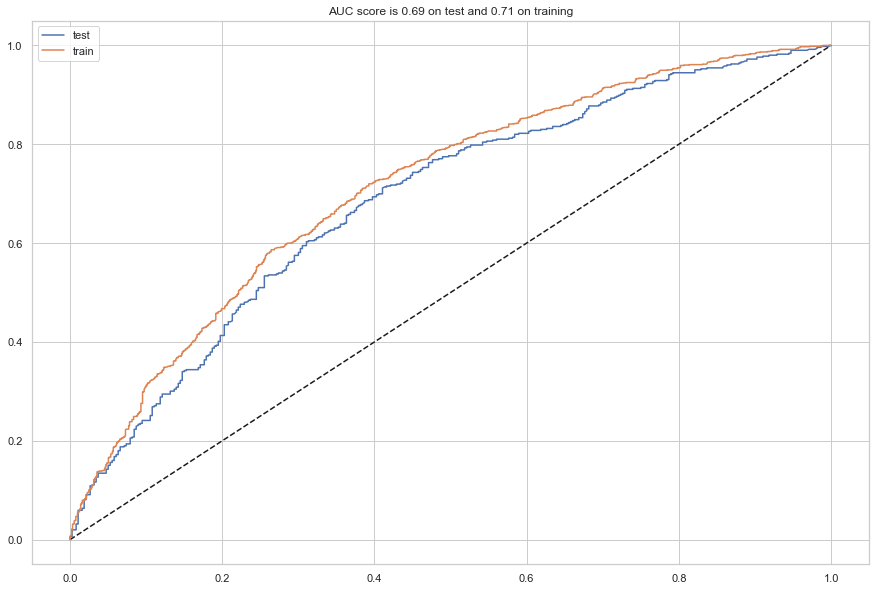

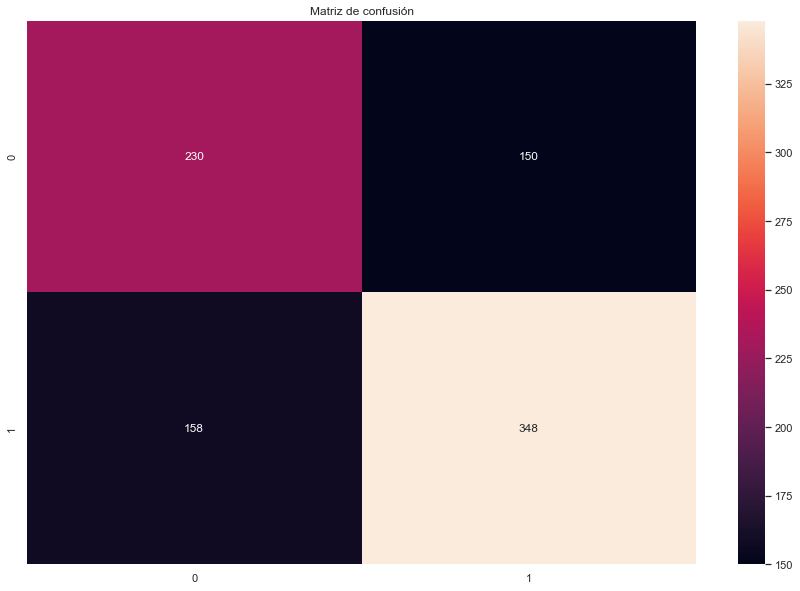

In [86]:
analiza_modelo(logreg)

### Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [89]:
y_pred = rf_clf.predict(X_test)

In [90]:
evaluar_modelo(y_test, y_pred)

Exactitud: 56.20767494356659
Sensibilidad: 59.683794466403164
Especificidad: 51.578947368421055


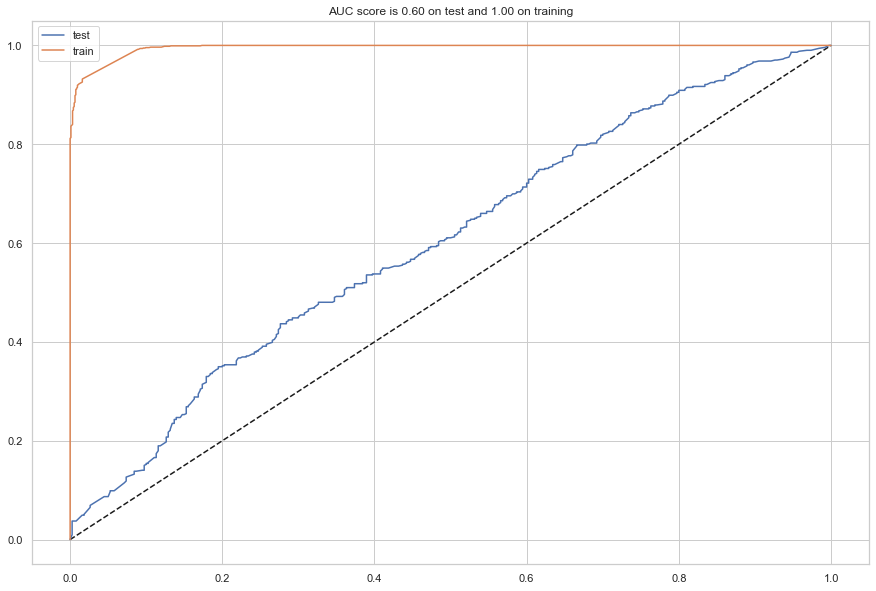

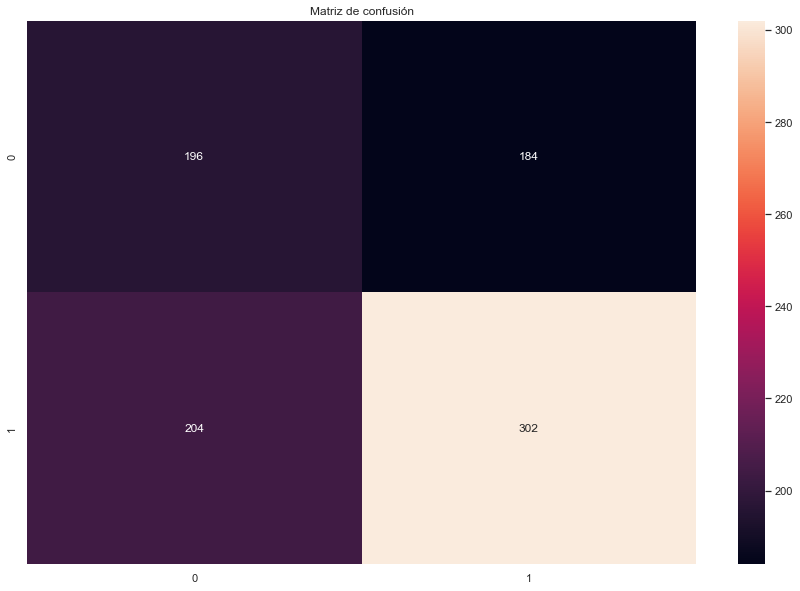

In [91]:
analiza_modelo(rf_clf)

### Gaussian Naive Bayes

In [92]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)
y_pred = gaussian_nb.predict(X_test)

In [93]:
evaluar_modelo(y_test, y_pred)

Exactitud: 62.189616252821665
Sensibilidad: 66.79841897233202
Especificidad: 56.05263157894736


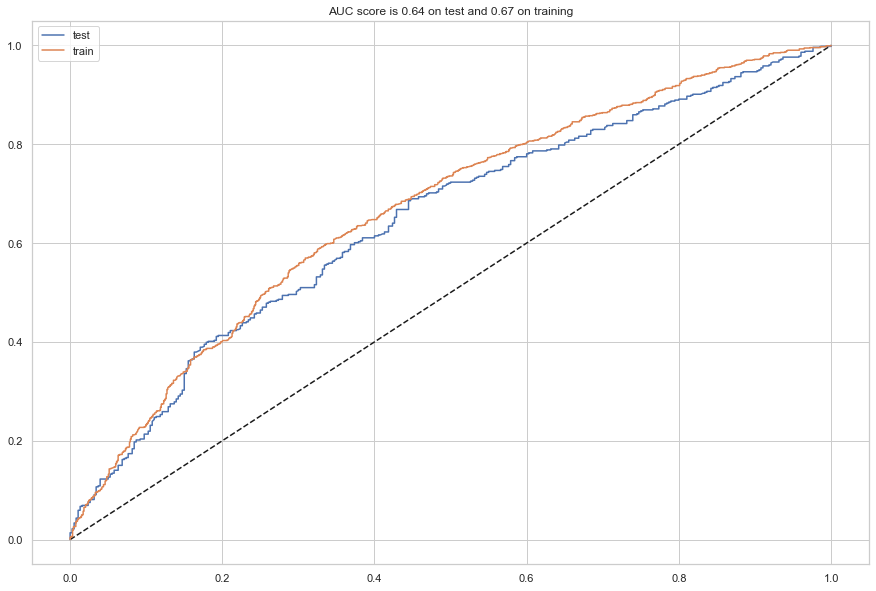

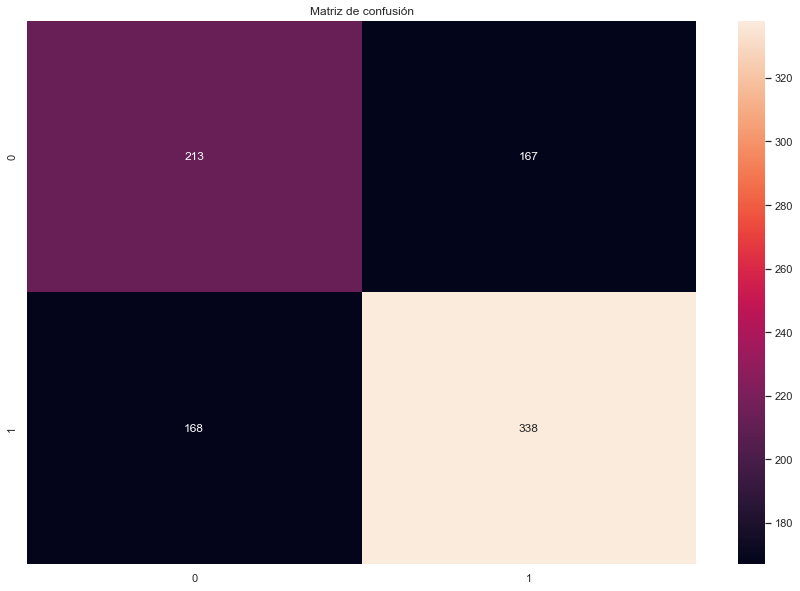

In [94]:
analiza_modelo(gaussian_nb)

### SVM (Support Vector Machine)

In [95]:
from sklearn.svm import SVC

In [96]:
svc = SVC(kernel="rbf", probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
evaluar_modelo(y_pred, y_test)

Exactitud: 64.55981941309255
Sensibilidad: 68.53281853281852
Especificidad: 58.96739130434783


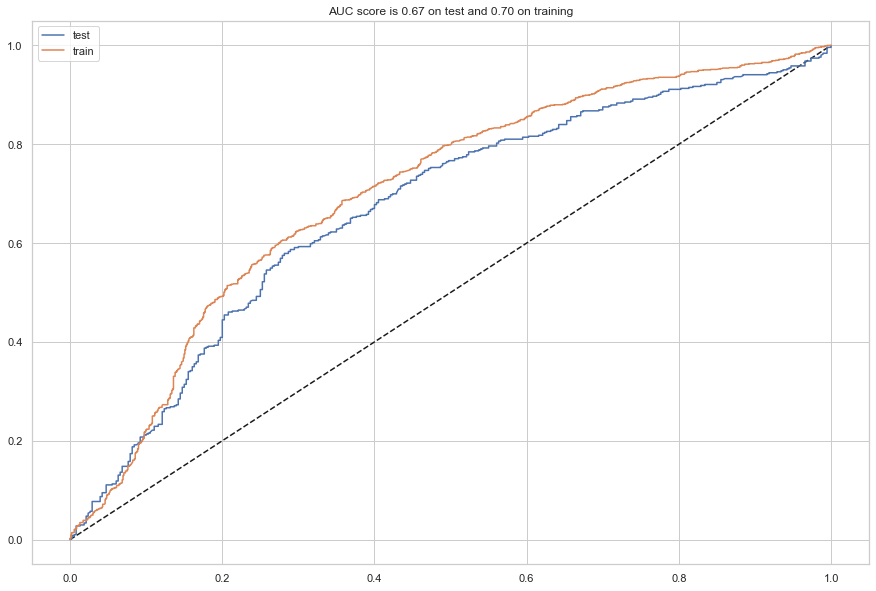

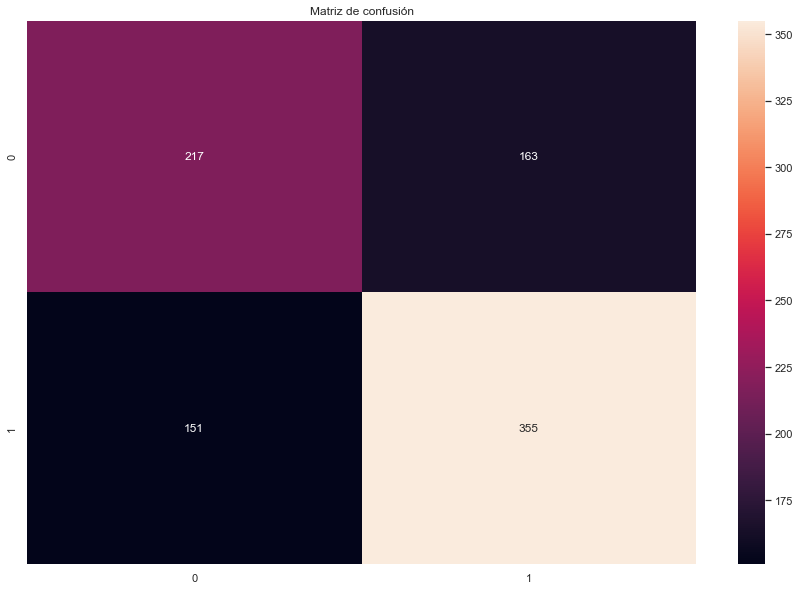

In [97]:
analiza_modelo(svc)

In [98]:
# Validación cruzada SVM
svm_val = cross_val_score(svc, X , y, scoring="accuracy", cv=10)
svm_val.mean()*100

65.25813101236831

In [99]:
svm_val.mean()

0.652581310123683

## Simulación de finales

Una vez que se eligió el modelo Regresión Logística es el que se usará para la predicción del torneo así como de la liguilla, la cual será de los 8 equipos clasificados.

* Monterrey
* America
* Guadalajara
* Toluca
* UANL
* Atlas
* Atletico
* Santos


In [100]:
equipo_estadisticas.tail()

,Torneo,Equipo,Goles,Goles_V,Posicion,Posicion_V,Posicion_cambio,PuntosTotal,Resultado,Dif_posicion,Puntos_Pos,Puntos
2948,Clausura 2023,America,3,1,2,12,-1,34,1,10,0.250000,3
2949,Clausura 2023,America,1,0,2,16,-1,34,1,14,0.187500,3
2950,Clausura 2023,America,2,2,2,4,-1,34,2,2,0.250000,1
2951,Clausura 2023,America,2,0,2,7,-1,34,1,5,0.428571,3
2952,Clausura 2023,America,4,2,2,3,-1,34,1,1,1.000000,3


Se definen funciones que extraeran las estadísticas de cada equipo tanto de los últimos torneos como del actual

In [101]:
def extraer_estadisticas(equipo_1):
#equipo_1 = "America"
    ultimos10eq = equipo_estadisticas.loc[(equipo_estadisticas["Equipo"] == equipo_1) & (equipo_estadisticas.Torneo.isin(nomultimos10))]#.sort_values(by=['Equipo'], ascending=False)
    tempActualeq = ultimos10eq.loc[(ultimos10eq["Equipo"] == equipo_1) & (ultimos10eq['Torneo']=='Clausura 2023')]

    equipo_1_posicion = ultimos10eq["Posicion"].values[-1]
    equipo_1_goles10t = ultimos10eq.Goles.mean()
    equipo_1_golestem = tempActualeq.Goles.mean()
    equipo_1_goles_vis_10t = ultimos10eq.Goles_V.mean()
    equipo_1_goles_vis_tem = tempActualeq.Goles_V.mean()
    equipo_1_pos_vis_10t = ultimos10eq.Posicion_V.mean()
    equipo_1_pos_vis_tem = tempActualeq.Posicion_V.mean()
    equipo_1_dg_pos_10t = ultimos10eq.Puntos_Pos.mean()
    equipo_1_dg_pos_tem = tempActualeq.Puntos_Pos.mean()

    return [equipo_1_posicion, equipo_1_goles10t, equipo_1_golestem, equipo_1_goles_vis_10t, equipo_1_goles_vis_tem, equipo_1_pos_vis_10t, equipo_1_pos_vis_tem, equipo_1_dg_pos_10t, equipo_1_dg_pos_tem]

In [102]:
def genera_est_equipos(equipo_1, equipo2):
    dif_posicion = equipo_1[0] - equipo2[0]
    dif_goles_10t = equipo_1[1] - equipo2[1]
    dif_goles_tem = equipo_1[2] - equipo2[2]
    dif_goles_vis_10t = equipo_1[3] - equipo2[3]
    dif_goles_vis_tem = equipo_1[4] - equipo2[4]
    dif_goles_por_posicion = (equipo_1[1]/equipo_1[5]) - (equipo2[1]/equipo2[5])
    dif_posicion_vis_10t = equipo_1[5] - equipo2[5]
    dif_posicion_vis_tem = equipo_1[6] - equipo2[6]
    dif_goles_puntos_pos_10t = equipo_1[7] - equipo2[7]
    dif_goles_puntos_pos_tem = equipo_1[8] - equipo2[8]
    
    return [dif_posicion,dif_goles_10t,dif_goles_tem,dif_goles_vis_10t,dif_goles_vis_tem,dif_goles_por_posicion,dif_posicion_vis_10t,dif_posicion_vis_tem,dif_goles_puntos_pos_10t,dif_goles_puntos_pos_tem, 1 ,0]


In [103]:
equiposC2023 = {'C2023':[['America', 0, []],
		  ['Atlas', 0, []],
		  ['Atletico', 0, []],
		  ['Cruz Azul', 0, []],
		  ['FC Juarez', 0, []],
		  ['Guadalajara', 0, []],
		  ['Leon', 0, []],
		  ['Mazatlan', 0, []],
		  ['Monterrey', 0, []],
		  ['Necaxa', 0, []],
		  ['Pachuca', 0, []],
		  ['Puebla', 0, []],
		  ['Queretaro', 0, []],
		  ['Santos', 0, []],
		  ['Tijuana', 0, []],
		  ['Toluca', 0, []],
		  ['UANL', 0, []],
		  ['UNAM', 0, []]]}
		  

In [104]:
rolPartidos = [('C2023', 'America', 'Queretaro'),
('C2023', 'Atlas', 'Toluca'),
('C2023', 'Mazatlan', 'Leon'),
('C2023', 'Monterrey', 'Guadalajara'),
('C2023', 'Necaxa', 'Atletico'),
('C2023', 'Pachuca', 'Puebla'),
('C2023', 'Santos', 'UANL'),
('C2023', 'Tijuana', 'Cruz Azul'),
('C2023', 'UNAM', 'FC Juarez'),
('C2023', 'Atlas', 'Mazatlan'),
('C2023', 'Atletico', 'Guadalajara'),
('C2023', 'Cruz Azul', 'Monterrey'),
('C2023', 'FC Juarez', 'Tijuana'),
('C2023', 'Leon', 'Necaxa'),
('C2023', 'Puebla', 'Queretaro'),
('C2023', 'Santos', 'UNAM'),
('C2023', 'Toluca', 'America'),
('C2023', 'UANL', 'Pachuca'),
('C2023', 'America', 'Puebla'),
('C2023', 'Guadalajara', 'Toluca'),
('C2023', 'Mazatlan', 'Santos'),
('C2023', 'Monterrey', 'Atletico'),
('C2023', 'Necaxa', 'Cruz Azul'),
('C2023', 'Pachuca', 'FC Juarez'),
('C2023', 'Queretaro', 'Atlas'),
('C2023', 'Tijuana', 'UANL'),
('C2023', 'UNAM', 'Leon'),
('C2023', 'America', 'Mazatlan'),
('C2023', 'Atlas', 'Santos'),
('C2023', 'FC Juarez', 'Guadalajara'),
('C2023', 'Pachuca', 'Necaxa'),
('C2023', 'Puebla', 'Monterrey'),
('C2023', 'Queretaro', 'Cruz Azul'),
('C2023', 'Tijuana', 'UNAM'),
('C2023', 'Toluca', 'Leon'),
('C2023', 'UANL', 'Atletico'),
('C2023', 'Atletico', 'Puebla'),
('C2023', 'Cruz Azul', 'UANL'),
('C2023', 'Guadalajara', 'Queretaro'),
('C2023', 'Leon', 'Pachuca'),
('C2023', 'Mazatlan', 'FC Juarez'),
('C2023', 'Monterrey', 'Toluca'),
('C2023', 'Necaxa', 'Tijuana'),
('C2023', 'Santos', 'America'),
('C2023', 'UNAM', 'Atlas'),
('C2023', 'America', 'Necaxa'),
('C2023', 'Atlas', 'Monterrey'),
('C2023', 'FC Juarez', 'Santos'),
('C2023', 'Pachuca', 'Guadalajara'),
('C2023', 'Puebla', 'Mazatlan'),
('C2023', 'Queretaro', 'Leon'),
('C2023', 'Tijuana', 'Atletico'),
('C2023', 'Toluca', 'Cruz Azul'),
('C2023', 'UANL', 'UNAM'),
('C2023', 'Atletico', 'America'),
('C2023', 'Cruz Azul', 'Atlas'),
('C2023', 'Guadalajara', 'Tijuana'),
('C2023', 'Leon', 'Puebla'),
('C2023', 'Mazatlan', 'Pachuca'),
('C2023', 'Monterrey', 'Queretaro'),
('C2023', 'Necaxa', 'UNAM'),
('C2023', 'Santos', 'Toluca'),
('C2023', 'UANL', 'FC Juarez'),
('C2023', 'America', 'Tijuana'),
('C2023', 'Atlas', 'UANL'),
('C2023', 'Atletico', 'Santos'),
('C2023', 'FC Juarez', 'Leon'),
('C2023', 'Monterrey', 'Necaxa'),
('C2023', 'Pachuca', 'Toluca'),
('C2023', 'Puebla', 'Cruz Azul'),
('C2023', 'Queretaro', 'Mazatlan'),
('C2023', 'UNAM', 'Guadalajara'),
('C2023', 'Atlas', 'America'),
('C2023', 'Cruz Azul', 'FC Juarez'),
('C2023', 'Leon', 'Monterrey'),
('C2023', 'Mazatlan', 'UNAM'),
('C2023', 'Necaxa', 'Queretaro'),
('C2023', 'Santos', 'Puebla'),
('C2023', 'Tijuana', 'Pachuca'),
('C2023', 'Toluca', 'Atletico'),
('C2023', 'UANL', 'Guadalajara'),
('C2023', 'America', 'Pachuca'),
('C2023', 'Guadalajara', 'Santos'),
('C2023', 'Leon', 'Atletico'),
('C2023', 'Mazatlan', 'Cruz Azul'),
('C2023', 'Monterrey', 'FC Juarez'),
('C2023', 'Necaxa', 'UANL'),
('C2023', 'Queretaro', 'Toluca'),
('C2023', 'Tijuana', 'Atlas'),
('C2023', 'UNAM', 'Puebla'),
('C2023', 'Atlas', 'Leon'),
('C2023', 'Atletico', 'Queretaro'),
('C2023', 'Cruz Azul', 'UNAM'),
('C2023', 'FC Juarez', 'Necaxa'),
('C2023', 'Pachuca', 'Monterrey'),
('C2023', 'Puebla', 'Guadalajara'),
('C2023', 'Santos', 'Tijuana'),
('C2023', 'Toluca', 'Mazatlan'),
('C2023', 'UANL', 'America'),
('C2023', 'Cruz Azul', 'Atletico'),
('C2023', 'Guadalajara', 'America'),
('C2023', 'Leon', 'Santos'),
('C2023', 'Mazatlan', 'Necaxa'),
('C2023', 'Puebla', 'Atlas'),
('C2023', 'Queretaro', 'FC Juarez'),
('C2023', 'Tijuana', 'Toluca'),
('C2023', 'UANL', 'Monterrey'),
('C2023', 'UNAM', 'Pachuca'),
('C2023', 'America', 'Leon'),
('C2023', 'Atlas', 'Guadalajara'),
('C2023', 'Atletico', 'Mazatlan'),
('C2023', 'FC Juarez', 'Puebla'),
('C2023', 'Monterrey', 'Tijuana'),
('C2023', 'Necaxa', 'Santos'),
('C2023', 'Pachuca', 'Cruz Azul'),
('C2023', 'Queretaro', 'UNAM'),
('C2023', 'Toluca', 'UANL'),
('C2023', 'America', 'Monterrey'),
('C2023', 'FC Juarez', 'Atlas'),
('C2023', 'Guadalajara', 'Necaxa'),
('C2023', 'Leon', 'Cruz Azul'),
('C2023', 'Puebla', 'Toluca'),
('C2023', 'Santos', 'Pachuca'),
('C2023', 'Tijuana', 'Queretaro'),
('C2023', 'UANL', 'Mazatlan'),
('C2023', 'UNAM', 'Atletico'),
('C2023', 'Atlas', 'Pachuca'),
('C2023', 'Atletico', 'FC Juarez'),
('C2023', 'Cruz Azul', 'America'),
('C2023', 'Leon', 'Guadalajara'),
('C2023', 'Mazatlan', 'Tijuana'),
('C2023', 'Monterrey', 'Santos'),
('C2023', 'Necaxa', 'Puebla'),
('C2023', 'Queretaro', 'UANL'),
('C2023', 'UNAM', 'Toluca'),
('C2023', 'America', 'UNAM'),
('C2023', 'Guadalajara', 'Cruz Azul'),
('C2023', 'Mazatlan', 'Monterrey'),
('C2023', 'Necaxa', 'Atlas'),
('C2023', 'Pachuca', 'Atletico'),
('C2023', 'Santos', 'Queretaro'),
('C2023', 'Tijuana', 'Leon'),
('C2023', 'Toluca', 'FC Juarez'),
('C2023', 'UANL', 'Puebla'),
('C2023', 'Atletico', 'Atlas'),
('C2023', 'Cruz Azul', 'Santos'),
('C2023', 'FC Juarez', 'America'),
('C2023', 'Guadalajara', 'Mazatlan'),
('C2023', 'Leon', 'UANL'),
('C2023', 'Monterrey', 'UNAM'),
('C2023', 'Puebla', 'Tijuana'),
('C2023', 'Queretaro', 'Pachuca'),
('C2023', 'Toluca', 'Necaxa')]

**Consideraciones para la simulación**

* El modelo predice si el equipo_1 gana o no gana, por lo tanto es necesario definir que pasa si existe empate.
* Se hará la predición de 2 juegos cambiando el equipo_1 y equipo_2.
* Ganará el equipo con mayor probabilidad. 
* Si el equipo local gana como equipo_1 y pierde como equipo_2 o si el equipo local gana como equipo_2 y pierde como equipo_1 será considerado como empate

In [105]:

from operator import itemgetter

grupo_liguilla = []
ultimo_grupo = ""

for k in equiposC2023.keys():
    for t in equiposC2023[k]:
        t[1] = 0
        t[2] = []
        
for equipos in rolPartidos:
    empate = False
    equipo_1 = extraer_estadisticas(equipos[1])
    equipo_2 = extraer_estadisticas(equipos[2])
    #print("-"*10)
    #print("equipo_1",equipo_1)
    #print("equipo_2",equipo_2)
  
    est_adicionales_g1 = genera_est_equipos(equipo_1, equipo_2)
    est_adicionales_g2 = genera_est_equipos(equipo_2, equipo_1)

    #PARA USAR MODELO SVM
    #probs_g1 = svc.predict_proba([est_adicionales_g1])
    #probs_g2 = svc.predict_proba([est_adicionales_g2])
    
    #USANDO REGRESION LOGISTICA
    probs_g1 = logreg.predict_proba([est_adicionales_g1])
    probs_g2 = logreg.predict_proba([est_adicionales_g2])
    
    #print("Probabilidades")
    #print("Prob1", probs_g1)
    #print("Prob2", probs_g2)
    
    equipo_1_prob_g1 = probs_g1[0][0]
    equipo_1_prob_g2 = probs_g2[0][1]
    equipo_2_prob_g1 = probs_g1[0][1]
    equipo_2_prob_g2 = probs_g2[0][0]

    equipo_1_prob = (probs_g1[0][0] + probs_g2[0][1])/2
    equipo_2_prob = (probs_g2[0][0] + probs_g1[0][1])/2
    
    if ((equipo_1_prob_g1 > equipo_2_prob_g1) & (equipo_2_prob_g2 > equipo_1_prob_g2)) | ((equipo_1_prob_g1 < equipo_2_prob_g1) & (equipo_2_prob_g2 < equipo_1_prob_g2)):
        empate=True
        for i in equiposC2023[equipos[0]]:
            if i[0] == equipos[1] or i[0] == equipos[2]:
                i[1] += 1
                
    elif equipo_1_prob > equipo_2_prob:
        ganador = equipos[1]
        ganador_proba = equipo_1_prob
        for i in equiposC2023[equipos[0]]:
            if i[0] == equipos[1]:
                i[1] += 3
                
    elif equipo_2_prob > equipo_1_prob:  
        ganador = equipos[2]
        ganador_proba = equipo_2_prob
        for i in equiposC2023[equipos[0]]:
            if i[0] == equipos[2]:
                i[1] += 3
    
    for i in equiposC2023[equipos[0]]: #agregando criterio de desempate
            if i[0] == equipos[1]:
                i[2].append(equipo_1_prob)
            if i[0] == equipos[2]:
                i[2].append(equipo_2_prob)

    if ultimo_grupo != equipos[0]:
        if ultimo_grupo != "":
            print("\n")
            print("Torneo %s clasificacion: "%(ultimo_grupo))
            
            for i in equiposC2023[ultimo_grupo]: #agregando criterio de desempate
                i[2] = np.mean(i[2])
            
            puntos_finales = equiposC2023[ultimo_grupo]
            tabla_final = sorted(puntos_finales, key=itemgetter(1, 2), reverse = True)
            grupo_liguilla.append([tabla_final[0][0], tabla_final[1][0]])
            for i in tabla_final:
                print("%s -------- %d"%(i[0], i[1]))
        print("\n")
        print("-"*10+" Comenzando simulación para torneo %s "%(equipos[0])+"-"*10)
        
        
    if empate == False:
        print("Torneo %s - %s vs. %s: ganador %s con %.2f probabilidad"%(equipos[0], equipos[1], equipos[2], ganador, ganador_proba))
    else:
        print("Torneo %s - %s vs. %s: empate"%(equipos[0], equipos[1], equipos[2]))
    ultimo_grupo =  equipos[0]

print("\n")
print("Torneo %s clasif: "%(ultimo_grupo))

for i in equiposC2023[ultimo_grupo]: #adding crieterio de desempate
    i[2] = np.mean(i[2])
            
puntos_finales = equiposC2023[ultimo_grupo]
tabla_final = sorted(puntos_finales, key=itemgetter(1, 2), reverse = True)
grupo_liguilla.append([tabla_final[0][0], tabla_final[1][0]])
for i in tabla_final:
    print("%s -------- %d"%(i[0], i[1]))




---------- Comenzando simulación para torneo C2023 ----------
Torneo C2023 - America vs. Queretaro: ganador America con 0.72 probabilidad
Torneo C2023 - Atlas vs. Toluca: ganador Toluca con 0.64 probabilidad
Torneo C2023 - Mazatlan vs. Leon: ganador Leon con 0.81 probabilidad
Torneo C2023 - Monterrey vs. Guadalajara: ganador Monterrey con 0.56 probabilidad
Torneo C2023 - Necaxa vs. Atletico: ganador Atletico con 0.61 probabilidad
Torneo C2023 - Pachuca vs. Puebla: ganador Pachuca con 0.67 probabilidad
Torneo C2023 - Santos vs. UANL: ganador UANL con 0.66 probabilidad
Torneo C2023 - Tijuana vs. Cruz Azul: ganador Cruz Azul con 0.70 probabilidad
Torneo C2023 - UNAM vs. FC Juarez: ganador UNAM con 0.58 probabilidad
Torneo C2023 - Atlas vs. Mazatlan: ganador Atlas con 0.72 probabilidad
Torneo C2023 - Atletico vs. Guadalajara: ganador Guadalajara con 0.73 probabilidad
Torneo C2023 - Cruz Azul vs. Monterrey: ganador Monterrey con 0.67 probabilidad
Torneo C2023 - FC Juarez vs. Tijuana: empa

Torneo C2023 - Queretaro vs. Pachuca: ganador Pachuca con 0.64 probabilidad
Torneo C2023 - Toluca vs. Necaxa: ganador Toluca con 0.79 probabilidad


Torneo C2023 clasif: 
Monterrey -------- 49
America -------- 47
Guadalajara -------- 40
Toluca -------- 37
Pachuca -------- 37
Leon -------- 37
UANL -------- 34
Cruz Azul -------- 29
Atlas -------- 24
Queretaro -------- 19
Puebla -------- 19
Atletico -------- 16
Santos -------- 16
UNAM -------- 12
Tijuana -------- 6
Necaxa -------- 3
FC Juarez -------- 3
Mazatlan -------- 2


In [106]:
clasificados = [tabla_final[0][0],tabla_final[1][0],tabla_final[2][0],tabla_final[3][0],tabla_final[6][0],tabla_final[8][0],tabla_final[11][0],tabla_final[12][0]]

In [107]:
Fase_liguilla = {"Cuartos de Final": [], "Semifinal": [], "Final": []}

In [108]:
for p in Fase_liguilla.keys():
    Fase_liguilla[p] = []

fase_actual = ""
proximos_partidos = []

for p in Fase_liguilla.keys():
    #print(p)
    if p == "Cuartos de Final":
        control = []
        for a in range(0, int(len(clasificados)/2), 1):
            #print('Valor a: ',a,' len_clasif: ',len(clasificados))
            if a < len(clasificados):
                control.append(clasificados[a])
                #print(clasificados[a])
                control.append(clasificados[len(clasificados)-(a+1)])

        Fase_liguilla[p] = [[control[c], control[c+1]] for c in range(0, len(control)-1, 1) if c%2 == 0]
        #print('---->', Fase_liguilla)
        for i in range(0, len(Fase_liguilla[p]), 1):
            partido = Fase_liguilla[p][i]
            #print('->',partido)
            local = partido[0]
            visitante = partido[1]
            equipo_1 = extraer_estadisticas(local)
            equipo_2 = extraer_estadisticas(visitante)

            estadisticas_adic_p1 = genera_est_equipos(equipo_1, equipo_2)
            estadisticas_adic_p2 = genera_est_equipos(equipo_2, equipo_1)
            
            #USANDO MODELO SVM
            #probs_p1 = svc.predict_proba([estadisticas_adic_p1])
            #probs_p2 = svc.predict_proba([estadisticas_adic_p2])
                        
            #USANDO MODELO REGRESION LOGISTICA
            probs_p1 = logreg.predict_proba([estadisticas_adic_p1])
            probs_p2 = logreg.predict_proba([estadisticas_adic_p2])
            
            equipo_1_prob = (probs_p1[0][0] + probs_p2[0][1])/2
            equipo_2_prob = (probs_p2[0][0] + probs_p1[0][1])/2
            
            if fase_actual != p:
                print("-"*10)
                print("Predicción de %s"%(p))
                print("-"*10)
                #print("\n")
            
            if equipo_1_prob < equipo_2_prob:
                print("%s vs. %s: %s avanza con probabilidad de %.2f"%(local, visitante, visitante, equipo_2_prob))
                proximos_partidos.append(visitante)
            else:
                print("%s vs. %s: %s avanza con probabilidad de %.2f"%(local, visitante, local, equipo_1_prob))
                proximos_partidos.append(local)
            
            partido.append([equipo_1_prob, equipo_2_prob])
            Fase_liguilla[p][i] = partido
            fase_actual = p
        
    else:
        #print('-->',proximos_partidos)
        #Fase_liguilla[p] = [[proximos_partidos[c], proximos_partidos[c+1]] for c in range(0, len(proximos_partidos)-1, 1) if c%2 == 0]
        Fase_liguilla[p] = [[proximos_partidos[c], proximos_partidos[(len(proximos_partidos)-1)-c]] for c in range(0, len(proximos_partidos)-1, 1) if c%2 == 0]
        #print('----->',Fase_liguilla[p])
        proximos_partidos = []
        for i in range(0, len(Fase_liguilla[p])):
            
            partido = Fase_liguilla[p][i]
            local = partido[0]
            visitante = partido[1]
            equipo_1 = extraer_estadisticas(local)
            equipo_2 = extraer_estadisticas(visitante)
            
            estadisticas_adic_p1 = genera_est_equipos(equipo_1, equipo_2)
            estadisticas_adic_p2 = genera_est_equipos(equipo_2, equipo_1)
            
            probs_p1 = svc.predict_proba([estadisticas_adic_p1])
            probs_p2 = svc.predict_proba([estadisticas_adic_p2])
            
            equipo_1_prob = (probs_p1[0][0] + probs_p2[0][1])/2
            equipo_2_prob = (probs_p2[0][0] + probs_p1[0][1])/2
            
            if fase_actual != p:
                print("\n")
                print("-"*10)
                print("Predicción de %s"%(p))
                print("-"*10)
                #print("\n")
            
            if equipo_1_prob < equipo_2_prob:
                print("%s vs. %s: %s avanza con probabilidad de %.2f"%(local, visitante, visitante, equipo_2_prob))
                proximos_partidos.append(visitante)
            else:
                print("%s vs. %s: %s avanza con probabilidad de %.2f"%(local, visitante, local, equipo_1_prob))
                proximos_partidos.append(local)
            partido.append([equipo_1_prob, equipo_2_prob])
            Fase_liguilla[p][i] = partido
            fase_actual = p

----------
Predicción de Cuartos de Final
----------
Monterrey vs. Santos: Monterrey avanza con probabilidad de 0.77
America vs. Atletico: America avanza con probabilidad de 0.76
Guadalajara vs. Atlas: Guadalajara avanza con probabilidad de 0.67
Toluca vs. UANL: Toluca avanza con probabilidad de 0.55


----------
Predicción de Semifinal
----------
Monterrey vs. Toluca: Monterrey avanza con probabilidad de 0.61
Guadalajara vs. America: America avanza con probabilidad de 0.54


----------
Predicción de Final
----------
Monterrey vs. America: Monterrey avanza con probabilidad de 0.53


## Conclusiones

* De acuerdo al modelo el **Monterrey** sería el campeón del torneo Clausura 2023

* La predicción se hace con base en el modelo elegido que fue SVM ya que fue el que dio mejores resultados de los modelos evaluados.
* Toda la predicción se hace con las estadísticas obtenidas que son las principales de un partido.
* Se puede mejorar el modelo al meter más variables lo que va haciendo más complejo el modelo pero con mejor precisión.
